In [1]:
# Name: Mohammed Ahsan Bagsaria
# Reg. No: 240968484
# Section & Roll No. : CE 85
# Week 10 & 11 - DAV Assignment - IMDB DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Integration

In [3]:
df1 = pd.read_csv("IMDb_Dataset_1.csv")
df2 = pd.read_csv("IMDb_Dataset_2.csv")
df3 = pd.read_csv("IMDb_Dataset_3.csv")

In [4]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')
Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')
Index(['Title', 'Director', 'Star Cast', 'Year', 'IMDb Rating', 'MetaScore',
       'Certificates', 'Genre', 'Duration (minutes)'],
      dtype='object')


In [5]:
frames = [df1,df2,df3]
movies = pd.concat(frames)
df1.count()+df2.count()+df3.count()

Certificates          4573
Director              4573
Duration (minutes)    4573
Genre                 4573
IMDb Rating           4573
MetaScore             4573
Star Cast             4573
Title                 4573
Year                  4573
dtype: int64

This is an important step to understand the effect of dropping duplicates here.

# Data Cleaning

In [6]:
# Handling duplicates
movies.drop_duplicates(inplace=True)

In [7]:
# Checking for Nan values
print(movies.isnull().sum()) 
print()
print(movies.isnull().values.any())

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

False


Thus, through these insights, we can conclude that there are no Nan values in the merged dataset.

In [8]:
# Checking for outliers in MetaScore
movies[(movies['MetaScore']>100) | (movies['MetaScore']<0)].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
# Checking for outliers in Rating
movies[(movies['IMDb Rating']>10) | (movies['IMDb Rating']<0)].value_counts()

Series([], Name: count, dtype: int64)

This implies that the data is already clean and consistent

# Data Exploration

In [10]:
# Counting the entries now, after treating duplicates
movies.count()

Title                 3895
IMDb Rating           3895
Year                  3895
Certificates          3895
Genre                 3895
Director              3895
Star Cast             3895
MetaScore             3895
Duration (minutes)    3895
dtype: int64

Thus, handling duplicates in the merged dataset was essential

In [11]:
# Different columns in the dataset
print(list(movies.columns))

['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']


In [12]:
# 5 number summary for the numerical features in the dataset
display(movies.describe()) #This is a function from IPython, which is an interactive command-line terminal for Python

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,3895.000000,3895.000000,3895.000000,3895.000000
mean,6.775841,2004.586393,63.502054,111.337535
std,0.873039,17.477366,12.736802,21.205658
min,3.900000,1917.000000,11.000000,46.000000
25%,6.200000,1996.000000,57.100000,98.000000
50%,6.800000,2010.000000,66.000000,114.000000
75%,7.400000,2017.000000,67.000000,116.300000
max,9.500000,2025.000000,100.000000,317.000000


This gives us information about the average, max ratings, metascore etc. 
important for understanding the details of films produced in the given timeframe.

In [13]:
# Displaying the information of the dataset, including data types,
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3895 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3895 non-null   object 
 1   IMDb Rating         3895 non-null   float64
 2   Year                3895 non-null   int64  
 3   Certificates        3895 non-null   object 
 4   Genre               3895 non-null   object 
 5   Director            3895 non-null   object 
 6   Star Cast           3895 non-null   object 
 7   MetaScore           3895 non-null   float64
 8   Duration (minutes)  3895 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 304.3+ KB
None


In [14]:
# ndim (Dimensions) and shape (Number of rows and columns here, since the dimension is 2) 
print(movies.shape)
print(movies.ndim)

(3895, 9)
2


In [15]:
# Different types of Genre
print('Number of Genres:',movies['Genre'].nunique())
print()
print(movies['Genre'].value_counts())

Number of Genres: 18

Genre
Biography      702
Action         607
Animation      585
Drama          484
Comedy         452
Adventure      391
Documentary    236
Sci-Fi         203
Crime           78
Horror          77
Fantasy         29
Family          20
Mystery         15
History          7
Romance          4
Musical          3
Thriller         1
Reality-TV       1
Name: count, dtype: int64


In [16]:
# Identifying the timeframe of the dataset
print("Number of years :",movies['Year'].nunique())
print(movies['Year'].value_counts())
print()
print('First year of observation:',movies['Year'].min())
print('Last year of observation:',movies['Year'].max())

Number of years : 100
Year
2023    164
2016    150
2018    148
2014    146
2024    145
       ... 
1918      1
1934      1
1933      1
1938      1
1924      1
Name: count, Length: 100, dtype: int64

First year of observation: 1917
Last year of observation: 2025


In [17]:
# Different kinds of Certificates
print(movies['Certificates'].nunique())
print()
print(movies['Certificates'].value_counts())

18

Certificates
R            1704
PG           1075
PG-13         601
G             259
Not Rated     115
Approved       49
TV-PG          28
TV-14          16
TV-G           11
NC-17           9
Unrated         8
TV-Y7           8
TV-MA           6
Passed          2
X               1
16+             1
M/PG            1
TV-Y7-FV        1
Name: count, dtype: int64


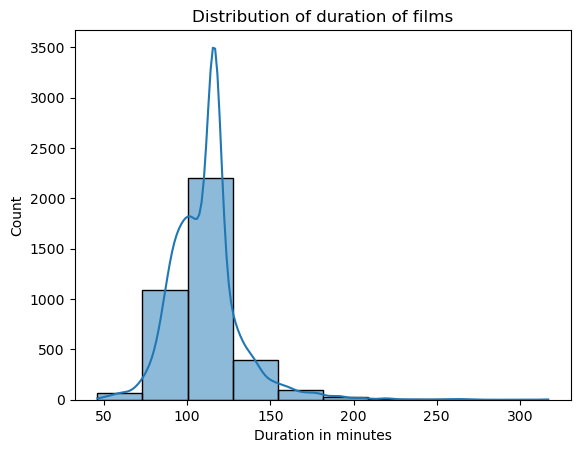

Average duration: 111.3375353016688
Median of Duration in minutes: 114.0


In [18]:
# Understanding the distribution of Duration of films
sns.histplot(data= movies,x = 'Duration (minutes)',bins=10,legend=False,kde=True)
plt.title('Distribution of duration of films')
plt.xlabel('Duration in minutes')
plt.show()
print('Average duration:',movies['Duration (minutes)'].mean())
print('Median of Duration in minutes:' ,movies['Duration (minutes)'].median())

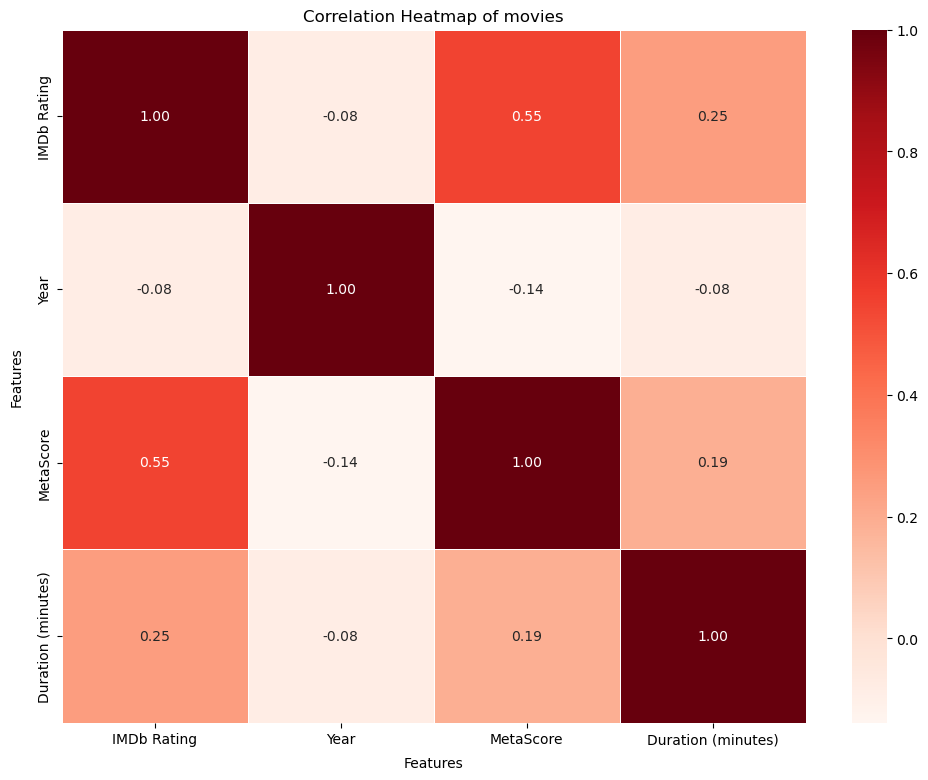

In [19]:
# Finding the correlation between various features in the dataset using a correlation heatmap
corr = movies[['IMDb Rating','Year','MetaScore','Duration (minutes)']].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='Reds',linewidths=0.5,fmt= "0.2f")
plt.title('Correlation Heatmap of movies')
plt.xlabel('Features',labelpad=7)
plt.ylabel('Features',labelpad = 10)
plt.show()

The only mildly significant correlation factor that is present between these four columns is
that between IMDb Rating and MetaScore with a correlation factor of 0.55.
Thus, IMDb Rating and MetaScore may have similar trends but not always.

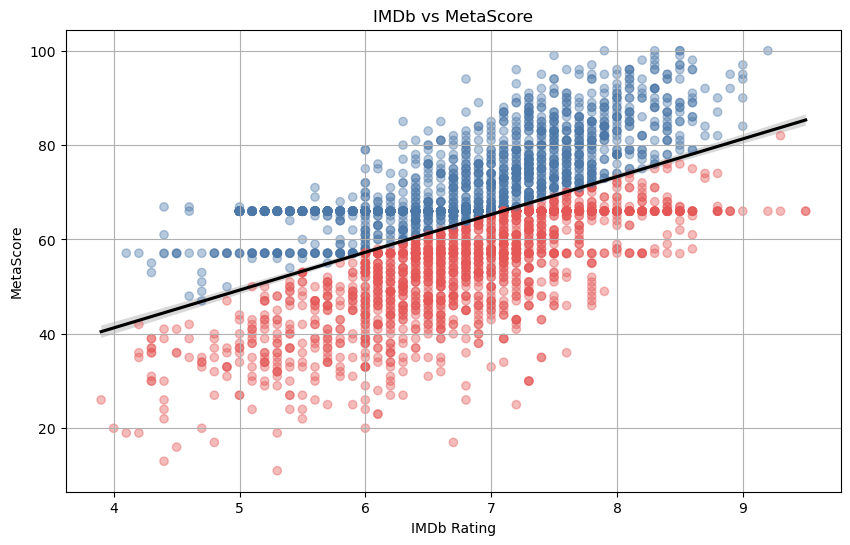

In [20]:
plt.figure(figsize=(10, 6))

# Fit regression first to get predictions
sns.regplot(x='IMDb Rating', y='MetaScore', data=movies, scatter=False, line_kws={'color': 'black'})

# Calculate residuals
x = movies['IMDb Rating']
y = movies['MetaScore']
residuals = y - np.polyval(np.polyfit(x, y, 1), x)  # Residuals from regression line - polyfit here fits a one degree polynomial, y=mx+c
# polyval calculates the value

plt.scatter(x, y, 
            c=np.where(residuals >= 0, '#4C78A8', '#E45756'),  # Blue=above, Red=below
            alpha=0.4)

plt.xlabel('IMDb Rating')
plt.ylabel('MetaScore')
plt.title('IMDb vs MetaScore')
plt.grid(True)

This regression plot helps us understand the relationship between Rating and Metascore

<Axes: title={'center': 'Boxplot of MetaScore'}>

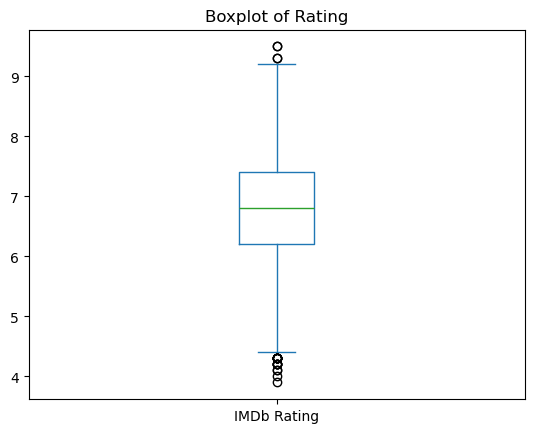

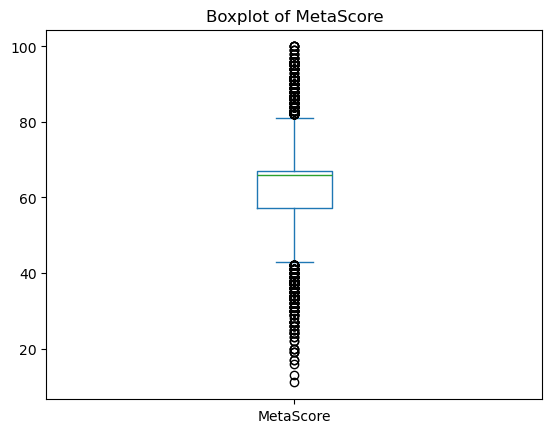

In [21]:
# Understanding the range of values for Rating and Metascore
movies.plot(kind='box',column = 'IMDb Rating',title="Boxplot of Rating")
movies.plot(kind='box',column = 'MetaScore',title='Boxplot of MetaScore')

In [22]:
movies.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')

In [23]:
# Total number of directors and starcast
print('Total number of directors: ',movies['Director'].nunique())
print('Total number of starcast: ',movies['Star Cast'].nunique())

Total number of directors:  2603
Total number of starcast:  3427


Correlation factor:  0.25084249544934034


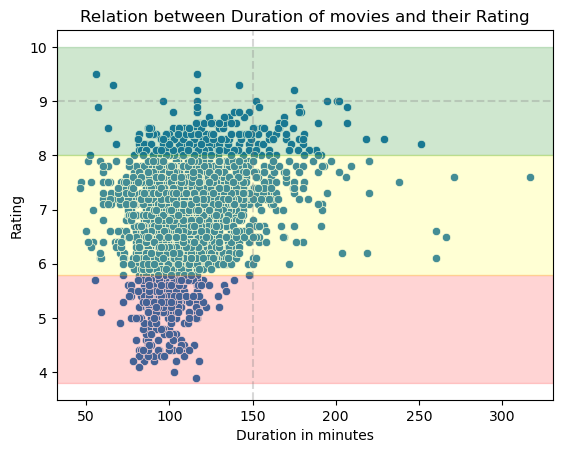

In [101]:
sns.scatterplot(data=movies, x='Duration (minutes)',y='IMDb Rating')
print('Correlation factor: ',movies['IMDb Rating'].corr(movies['Duration (minutes)']))
plt.title('Relation between Duration of movies and their Rating')
plt.xlabel('Duration in minutes')
plt.ylabel('Rating')
plt.axhspan(3.8,5.8,color='red',alpha=0.17)
plt.axhspan(5.8,8,color='yellow',alpha=0.17)
plt.axhspan(8,10,color='green',alpha=0.19)
plt.axvline(x=150,color='grey',linestyle='--',alpha=0.3)
plt.axhline(y=9,color='grey',linestyle='--',alpha=0.3)
plt.show()

Thus, we can see that the correlation factor is 0.25, indicating a small effect of Duration on the IMDb Rating. But, from the graph, we can see that movies whose duration exceeds 150 minutes have a rating that's greater than or equal to 6. But, its also important to note that the highest rated movies here have a duration of less than 150 minutes.

# Data Analysis and Visualization

In [24]:
# Number of movie releases per year
mpy = movies.groupby('Year').agg(movie_count = ('Title','count')).reset_index().sort_values(by= 'movie_count',ascending=False)
display(mpy)
print()
print('The most number of movies were released in:')
display(mpy.head(20))
print()
print('The least number of movies were released in:')
display(mpy.tail(20))

,Year,movie_count
97,2023,164
90,2016,150
92,2018,148
88,2014,146
98,2024,145
...,...,...
5,1930,1
4,1927,1
3,1924,1
2,1921,1



The most number of movies were released in:


,Year,movie_count
97,2023,164
90,2016,150
92,2018,148
88,2014,146
98,2024,145
89,2015,144
93,2019,133
87,2013,132
91,2017,131
84,2010,129



The least number of movies were released in:


,Year,movie_count
9,1935,3
29,1955,3
0,1917,2
10,1936,2
17,1943,2
13,1939,2
15,1941,2
99,2025,2
19,1945,2
23,1949,2


Number of movies produced per year (latest):


,Year,movie_count
98,2024,145
97,2023,164
96,2022,123
95,2021,113
94,2020,91
93,2019,133
92,2018,148
91,2017,131
90,2016,150
89,2015,144


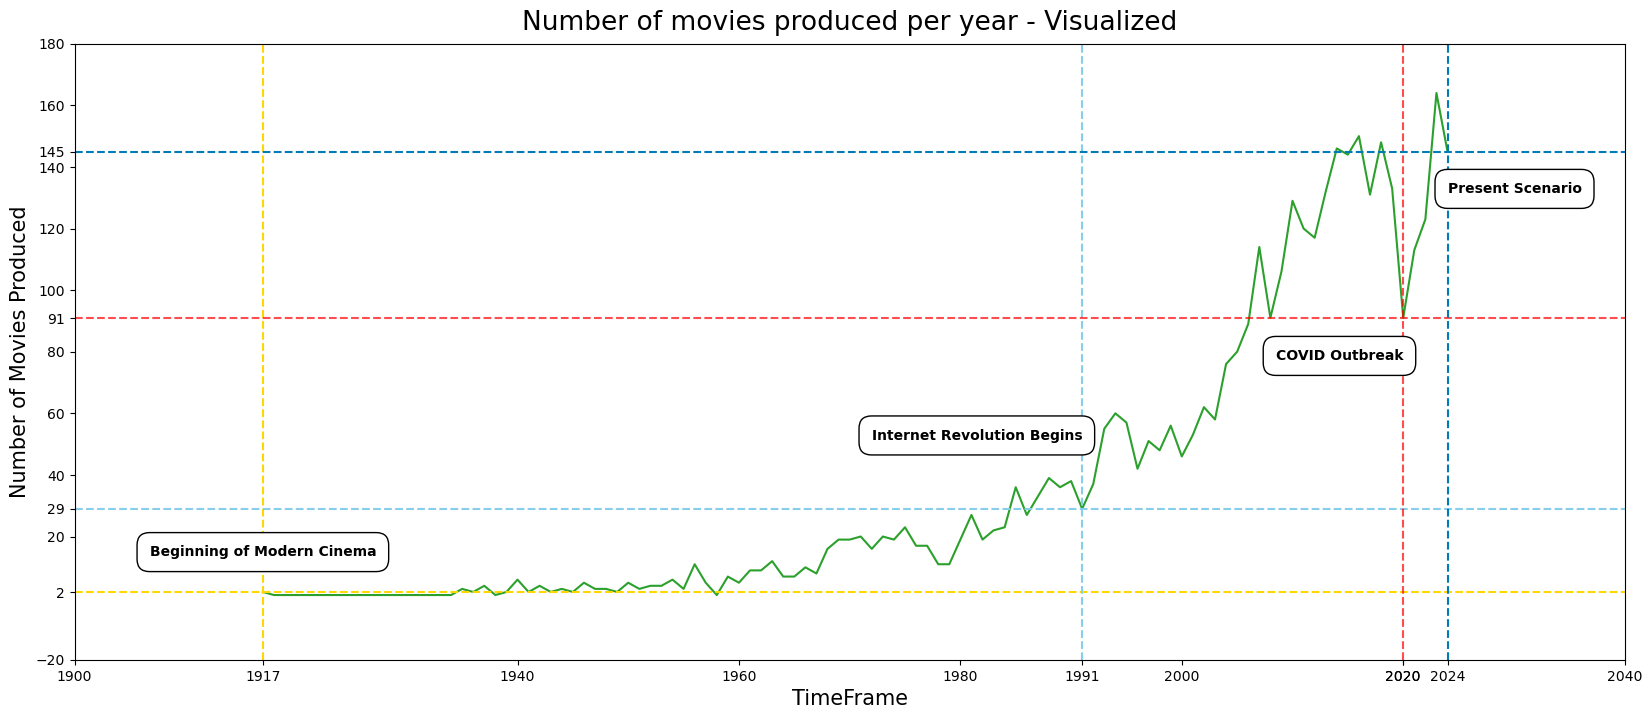

In [25]:
# Visualizing the number of films produced in a year , over the years - Time series plot

by_year = movies[movies['Year']<2025].groupby('Year').agg(movie_count = ('Title','count')).reset_index()
# The year 2025 is excluded since sufficient data isnt there for the year yet
print('Number of movies produced per year (latest):')
display(by_year.sort_values(by='Year',ascending=False).head(10))
plt.figure(figsize=(20,8))
plt.plot('Year','movie_count', data = by_year, color = '#2ca02c') # Emerald color displaying growth
plt.title('Number of movies produced per year - Visualized',fontsize=19,pad=10)
plt.xlabel('TimeFrame',fontsize=15)
plt.ylabel('Number of Movies Produced',fontsize=15)

y17 = by_year.loc[by_year['Year'] == 1917, 'movie_count'].values[0]
plt.axhline(y=y17, color='gold', linestyle='--')
plt.axvline(x=1917, color='gold', linestyle='--')
plt.text(1917, plt.ylim()[1] * 0.1, 'Beginning of Modern Cinema', color='black',fontweight='bold', ha='center', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.9'))

y91 = by_year.loc[by_year['Year'] == 1991, 'movie_count'].values[0]
plt.axhline(y=y91, color='skyblue', linestyle='--')
plt.axvline(x=1991, color='skyblue', linestyle='--')
plt.text(1991, plt.ylim()[1] * 0.32, 'Internet Revolution Begins', color='black',fontweight='bold', ha='right', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.9'))

y20 = by_year.loc[by_year['Year'] == 2020, 'movie_count'].values[0]
plt.axhline(y=y20, color='red', linestyle='--',alpha=0.7)
plt.axvline(x=2020, color='red', linestyle='--',alpha=0.7)
plt.text(2020, plt.ylim()[1] * 0.47, 'COVID Outbreak', color='black',fontweight='bold', ha='right', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.9'))

y24 = by_year.loc[by_year['Year'] == 2024, 'movie_count'].values[0]
plt.axhline(y=y24, color='#007BB8', linestyle='--')
plt.axvline(x=2024, color='#007BB8', linestyle='--')
plt.text(2024, plt.ylim()[1] * 0.785, 'Present Scenario', color='black',fontweight='bold', ha='left', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.9'))

xt = (list(plt.xticks()[0]) + [1991,2020,2024,1917])
xt.remove(1920)
plt.xticks(xt)
yt = (list(plt.yticks()[0]) + [y20,y91,y24,y17])
yt.remove(0)
plt.yticks(yt)
plt.show()

The tabulation and graph helps us understand the trend of movie production over the years

The plot clearly shows a rising trend since 1917,
attributed to the increasing availability of resources, advancements in technology, and growing public demand.
The slight dip in 2020 is most likely due to coronavirus outbreak across the world

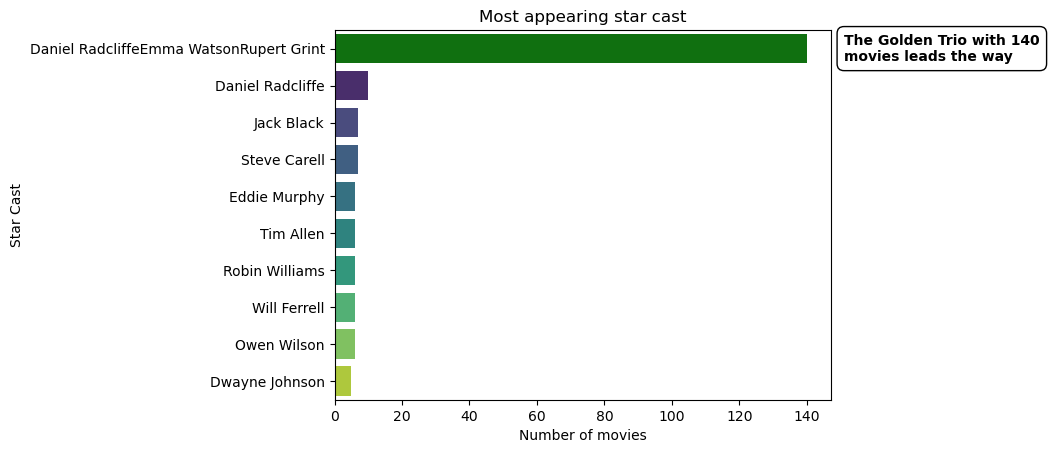

In [26]:
# Stars who acted in the most number of movies
mo_by_st = movies.groupby('Star Cast').agg(Movie_count = ('Title','count')).reset_index().sort_values(by='Movie_count',ascending=False)
cp = ['green'] + sns.color_palette('viridis', n_colors=9)
sns.barplot(data = mo_by_st.head(10) , x= 'Movie_count',y='Star Cast',hue='Star Cast',palette= cp,legend=False)
first_movie_count = mo_by_st.iloc[0]['Movie_count']
plt.text(
    first_movie_count + 11,  # X position slightly ahead of the bar - padding
    0,  # Y position at the first bar index
    'The Golden Trio with 140\nmovies leads the way',  
    color='black',
    fontweight='bold',
    ha='left',
    va='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
plt.title('Most appearing star cast')
plt.xlabel('Number of movies')
plt.ylabel('Star Cast')
plt.show()

Here, we see that the Star Cast: Daniel Radcliffe, Emma Watson, Rupert Grint , also called the golden trio have appeared in the 
most number of movies, according to this dataset (140 movies), far ahead than others.

In [102]:
# Displaying the best movies based on rating and MetaScore individually
display(movies[movies['IMDb Rating']==movies['IMDb Rating'].max()])
display(movies[movies['MetaScore']==movies['MetaScore'].max()])
display(movies[movies['IMDb Rating']==movies['IMDb Rating'].min()])
display(movies[movies['MetaScore']==movies['MetaScore'].min()])

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1710,Marty's Project,9.5,2010,R,Comedy,Andrew Kent,Naomi AshDavid BedfordJoanna Deering,66.0,116.3
2100,The People's Story,9.5,2000,PG,Documentary,Steven Scaffidi,Daniel RadcliffeEmma WatsonRupert Grint,66.0,56.0


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
137,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,175.0
694,Lawrence of Arabia,8.3,1962,PG,Adventure,David Lean,Peter O'TooleAlec GuinnessAnthony Quinn,100.0,218.0
2735,The Leopard,7.9,1963,PG,Drama,Luchino Visconti,Giuseppe Tomasi di LampedusaSuso Cecchi D'Amic...,100.0,186.0
3122,Casablanca,8.5,1942,PG,Drama,Michael Curtiz,Julius J. EpsteinPhilip G. EpsteinHoward Koch,100.0,102.0
3123,Rear Window,8.5,1954,PG,Mystery,Alfred Hitchcock,James StewartGrace KellyWendell Corey,100.0,112.0


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
43,Madame Web,3.9,2024,PG-13,Action,S.J. Clarkson,Matt SazamaBurk SharplessClaire Parker,26.0,116.0


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
51,Nine Lives,5.3,2016,PG,Comedy,Barry Sonnenfeld,Kevin Spacey,11.0,87.0


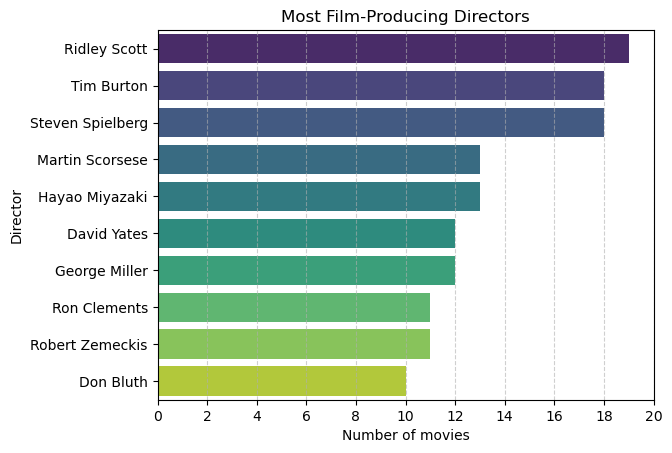

In [28]:
# Directors who have produced the most number of movies
mo_by_dir = movies.groupby('Director').agg(Movie_count = ('Title','count')).reset_index().sort_values(by='Movie_count',ascending=False)
sns.barplot(data = mo_by_dir.head(10) , x= 'Movie_count',y='Director',hue='Director',palette= 'viridis',legend=False)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.title('Most Film-Producing Directors')
plt.xlabel('Number of movies')
plt.ylabel('Director')
plt.xticks(np.arange(0, max(mo_by_dir['Movie_count']) + 3, 2))
plt.show()

Here, we see that Ridley Scott has produced the most number of movies (19), followed by Tim Burton and Steven Spielberg (18).
All these directors have produced significant number of movies, including Don Bluth (10), considering there are 2603 directors in this dataset.

In [30]:
# Finding the lowest ratings and MetaScores films have recieved which will be used for further analysis
print('Top ratings:\n',movies['IMDb Rating'].sort_values(ascending=True).head(10))
print()
print('Top MetaScores: \n',movies['MetaScore'].sort_values(ascending=True).head(10))

Top ratings:
 43     3.9
779    4.0
788    4.1
821    4.1
470    4.2
138    4.2
756    4.2
252    4.2
262    4.2
394    4.3
Name: IMDb Rating, dtype: float64

Top MetaScores: 
 51     11.0
373    13.0
352    16.0
206    17.0
107    17.0
788    19.0
262    19.0
167    19.0
785    20.0
779    20.0
Name: MetaScore, dtype: float64


In [29]:
# Finding the highest ratings and MetaScores films have recieved which will be used for further analysis
print('Top ratings:\n',movies['IMDb Rating'].sort_values(ascending=False).head(10))
print()
print('Top MetaScores: \n',movies['MetaScore'].sort_values(ascending=False).head(10))

Top ratings:
 2100    9.5
1710    9.5
2102    9.3
3172    9.3
137     9.2
1344    9.2
130     9.0
1039    9.0
742     9.0
1224    9.0
Name: IMDb Rating, dtype: float64

Top MetaScores: 
 3123    100.0
3122    100.0
2735    100.0
694     100.0
137     100.0
3074     99.0
529      99.0
3117     99.0
3141     98.0
1131     98.0
Name: MetaScore, dtype: float64


,Director,avg_rating,movie_count,high_rated_movies
440,Christopher Nolan,8.487500,8,7
369,Charles Chaplin,8.400000,4,4
1443,Lee Unkrich,8.350000,4,4
1919,Peter Jackson,8.333333,6,4
1970,Quentin Tarantino,8.316667,6,5
39,Akira Kurosawa,8.280000,5,4
2280,Stanley Kubrick,8.260000,5,4
1902,Pete Docter,8.142857,7,7
595,Denis Villeneuve,8.100000,5,4
120,Andrew Stanton,8.080000,5,4


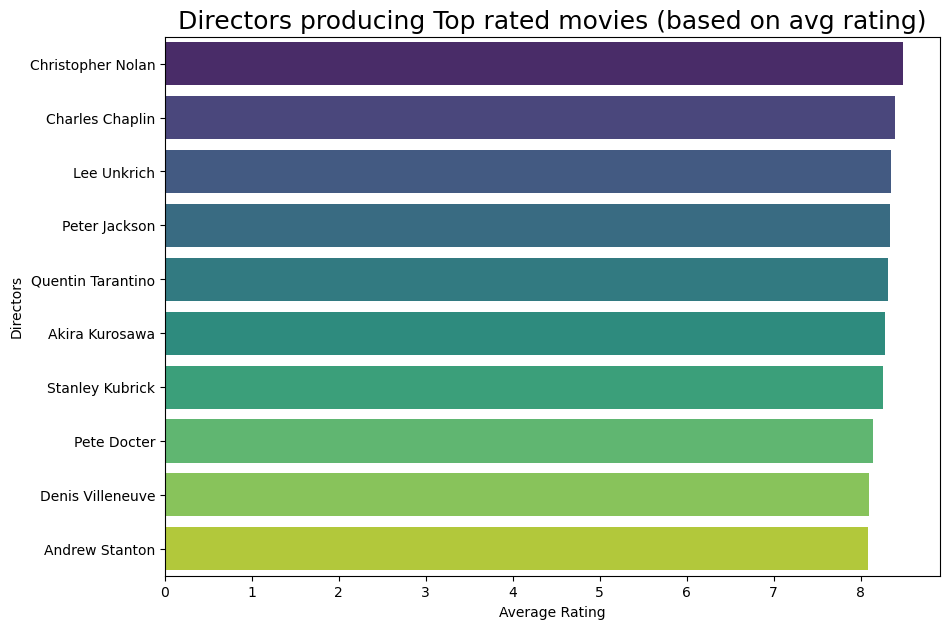

,Director,avg_rating,movie_count,high_rated_movies
907,Hayao Miyazaki,8.023077,13,8
440,Christopher Nolan,8.487500,8,7
1902,Pete Docter,8.142857,7,7
1970,Quentin Tarantino,8.316667,6,5
39,Akira Kurosawa,8.280000,5,4
120,Andrew Stanton,8.080000,5,4
369,Charles Chaplin,8.400000,4,4
595,Denis Villeneuve,8.100000,5,4
1443,Lee Unkrich,8.350000,4,4
1919,Peter Jackson,8.333333,6,4


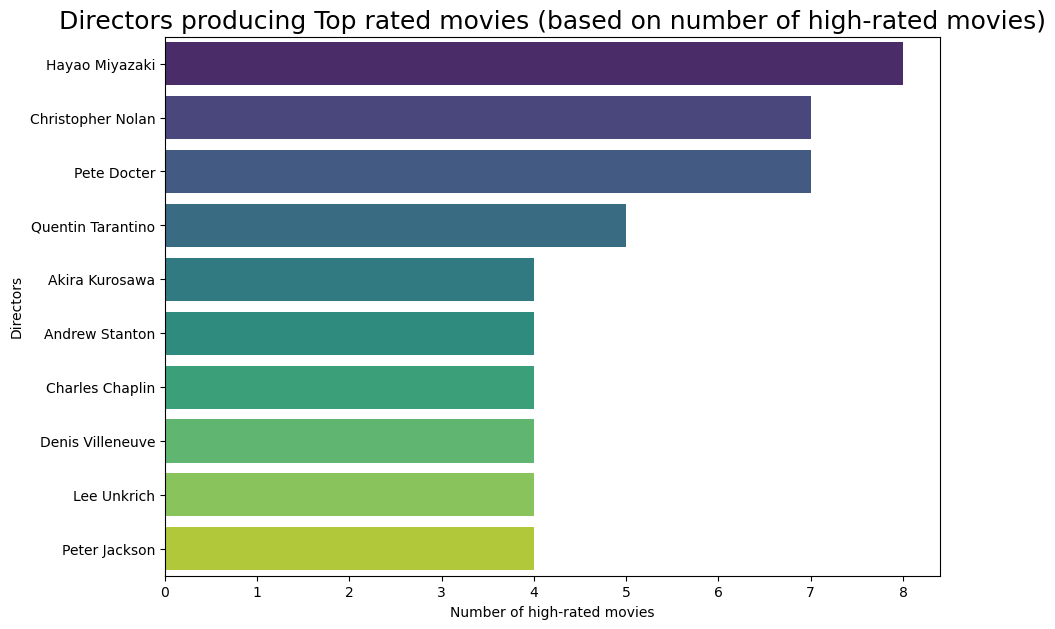

In [31]:
# Directors whose movies cannot be missed by viewers 

director_stats = movies.groupby('Director').agg(
    avg_rating=('IMDb Rating', 'mean'),
    movie_count=('Title', 'count'),
    high_rated_movies=('IMDb Rating', lambda x: (x >= 8.0).sum()) # Conditional counting, because (x>=8) creates a boolean series
).reset_index()

must_watch_directors = director_stats[
    (director_stats['avg_rating'] >= 8) & 
    (director_stats['movie_count'] >= 4) & 
    (director_stats['high_rated_movies'] >= 3)
].sort_values('avg_rating', ascending=False)

display(must_watch_directors.head(10))
plt.figure(figsize=(10,7))
sns.barplot(data = must_watch_directors.head(10) , x= 'avg_rating', y='Director',hue='Director',palette='viridis',legend=False)
plt.title("Directors producing Top rated movies (based on avg rating)",fontsize=18)
plt.xlabel("Average Rating")
plt.ylabel('Directors')
plt.show()

must_watch_directors = director_stats[
    (director_stats['avg_rating'] >= 8) & 
    (director_stats['movie_count'] >= 4) & 
    (director_stats['high_rated_movies'] >= 3)
].sort_values('high_rated_movies', ascending=False)

display(must_watch_directors.head(10))
plt.figure(figsize=(10,7))
sns.barplot(data = must_watch_directors.head(10) , x= 'high_rated_movies', y='Director',hue='Director',palette='viridis',legend=False)
plt.title("Directors producing Top rated movies (based on number of high-rated movies)",fontsize=18)
plt.xlabel("Number of high-rated movies")
plt.ylabel('Directors')
plt.show()

This chart highlights directors who've made consistently well-regarded films, with Christopher Nolan's work showing the highest average rating,followed by Charles Chaplin and Lee Unkrich, while Andrew Stanton's films, among this list, show the lowest average rating.

But, since Average rating can't be the sole criteria, we look at the number of successful films as well,
where Hayao Miyazaki, the creator of Studio Ghibli, leads with 8 highly rated films. 

The threshold for high rating is 8.0 . 

,Director,avg_rating,movie_count,low_rated_movies
1202,John Schultz,5.033333,3,3
1916,Peter Hewitt,5.160000,5,5
1660,Michael Lembeck,5.166667,3,3
2081,Robert Rodriguez,5.171429,7,6
277,Brad Peyton,5.233333,3,3
304,Brian Levant,5.242857,7,7
1980,Raja Gosnell,5.328571,7,7
2511,Walt Becker,5.366667,3,3
766,Frederik Du Chau,5.400000,3,2
2309,Steve Carr,5.425000,4,3


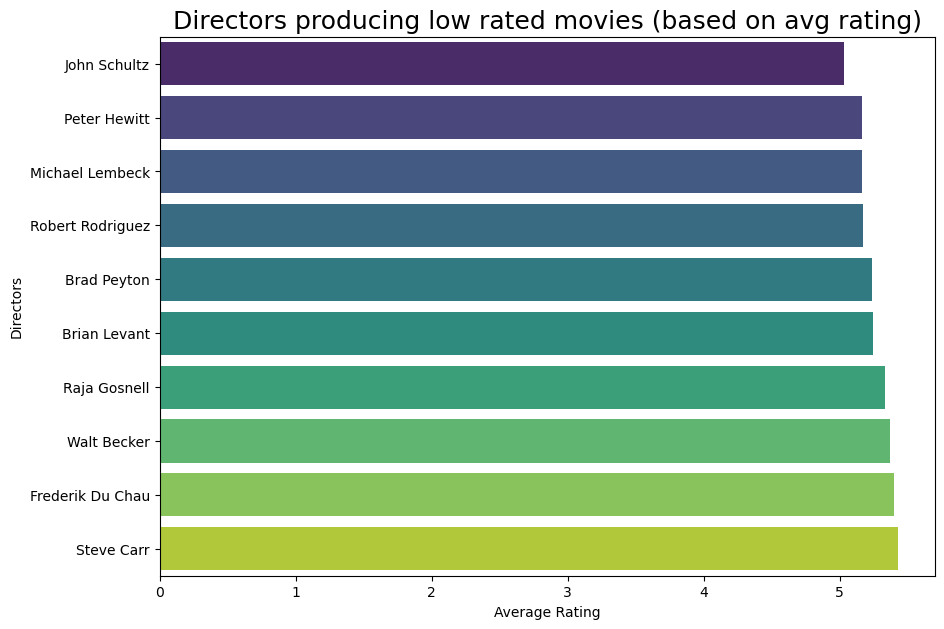

,Director,avg_rating,movie_count,low_rated_movies
304,Brian Levant,5.242857,7,7
1980,Raja Gosnell,5.328571,7,7
2412,Tim Hill,5.542857,7,6
2081,Robert Rodriguez,5.171429,7,6
1916,Peter Hewitt,5.160000,5,5
24,Adam Shankman,5.675000,4,4
127,Andy Fickman,5.520000,5,4
2309,Steve Carr,5.425000,4,3
1660,Michael Lembeck,5.166667,3,3
1202,John Schultz,5.033333,3,3


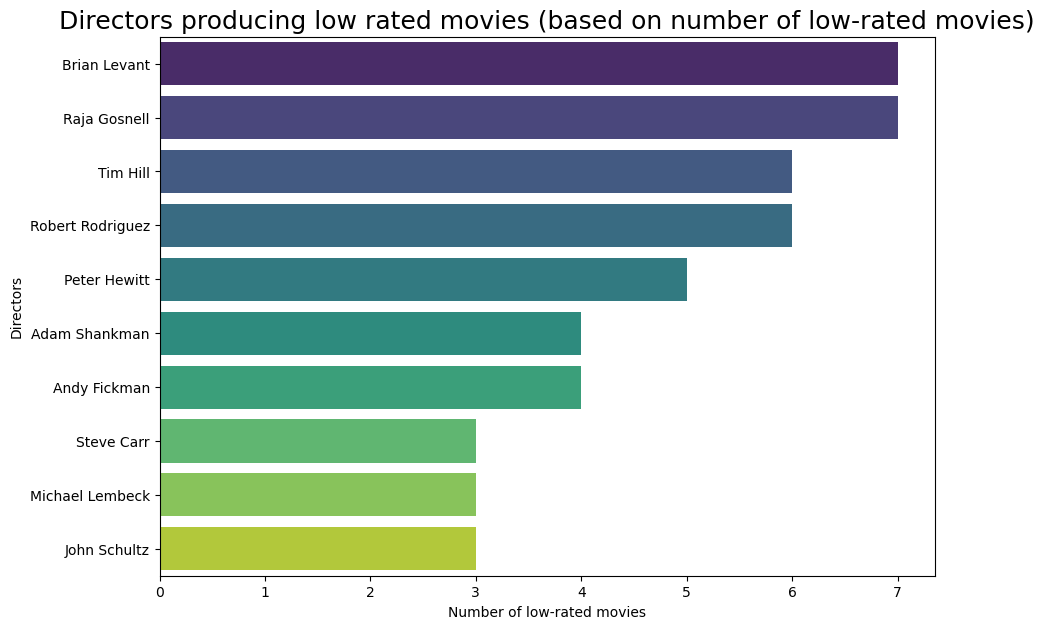

In [32]:
# Directors whose movies perhaps should be missed by viewers 

director_stats = movies.groupby('Director').agg(
    avg_rating=('IMDb Rating', 'mean'),
    movie_count=('Title', 'count'),
    low_rated_movies=('IMDb Rating', lambda x: (x <= 6.0).sum()) 
).reset_index()

directors = director_stats[
    (director_stats['avg_rating'] <= 6) & 
    (director_stats['movie_count'] >= 3) & 
    (director_stats['low_rated_movies'] >= 2)
].sort_values('avg_rating', ascending=True)

display(directors.head(10))
plt.figure(figsize=(10,7))
sns.barplot(data = directors.head(10) , x= 'avg_rating', y='Director',hue='Director',palette='viridis',legend=False)
plt.title("Directors producing low rated movies (based on avg rating)",fontsize=18)
plt.xlabel("Average Rating")
plt.ylabel('Directors')
plt.show()

directors = director_stats[
    (director_stats['avg_rating'] <=6) & 
    (director_stats['movie_count'] >= 3) & 
    (director_stats['low_rated_movies'] >= 2)
].sort_values('low_rated_movies', ascending=False)

display(directors.head(10))
plt.figure(figsize=(10,7))
sns.barplot(data = directors.head(10) , x= 'low_rated_movies', y='Director',hue='Director',palette='viridis',legend=False)
plt.title("Directors producing low rated movies (based on number of low-rated movies)",fontsize=18)
plt.xlabel("Number of low-rated movies")
plt.ylabel('Directors')
plt.show()

Here are two graphs showing the directors whose movies have performed very poorly based on viewer ratings, with the lowest average rating going 
down to 5.033, indicating that such movies are not worth watching.

All movies directed by John Schultz, Peter Hewitt, Brian Levant and Raja Gosnell and few others have performed very poorly.
While John Schultz has the lowest average rating, Brian Levant and Raja Gosnell have the highest number of low rated movies.

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
137,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,175.0
106,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
742,Schindler's List,9.0,1993,R,Biography,Steven Spielberg,Liam NeesonRalph FiennesBen Kingsley,95.0,195.0
1039,The Lord of the Rings: The Return of the King,9.0,2003,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,94.0,201.0
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,Francis Ford CoppolaMario Puzo,90.0,202.0


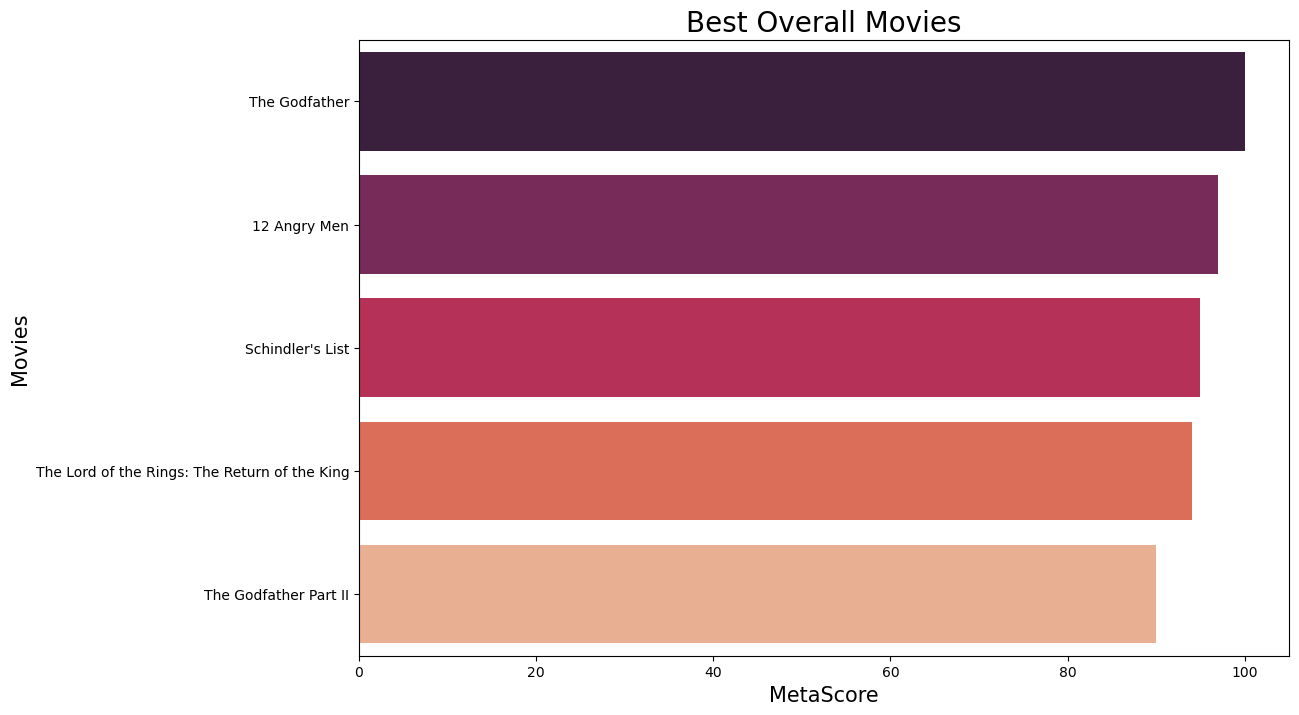

In [33]:
# Finding, displaying and visualizing the best overall movies
# That is, on the basis of high IMDb Rating and MetaScore
best_overall = movies[(movies['IMDb Rating']>=9) & (movies['MetaScore']>=90)].sort_values('MetaScore',ascending=False)
display(best_overall) 
plt.figure(figsize = (12,8))
sns.barplot(data = best_overall, x= 'MetaScore', y='Title',hue='Title',palette = 'rocket',legend=False)
plt.title('Best Overall Movies',fontsize=20)
plt.xlabel('MetaScore',fontsize=15)
plt.ylabel('Movies',fontsize=15)
plt.show()

This list considers the best movies, having the highest thresholds in both fields, IMDb Rating and MetaScore.
The movies that come in this list are by definition, exceptionally well directed and executed.

The crime blockbuster, The Godfather tops the list with a perfect MetaScore of 100, with a rating of 9.2.
Even its sequel, The Godfather Part 2 has performed really well.

The other three movies have a rating of 9 each, with MetaScore >=94, indicating strong overall performance.

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
373,Paul Blart: Mall Cop 2,4.4,2015,PG,Action,Andy Fickman,Kevin James,13.0,94.0
352,Kangaroo Jack,4.5,2003,PG,Action,David McNally,Anthony Anderson,16.0,89.0
262,Thomas and the Magic Railroad,4.2,2000,G,Adventure,Britt Allcroft,Alec Baldwin,19.0,85.0
788,The Cat in the Hat,4.1,2003,PG,Adventure,Bo Welch,Mike Myers,19.0,82.0
779,The Last Airbender,4.0,2010,PG,Action,M. Night Shyamalan,Noah Ringer,20.0,103.0
99,"Big Mommas: Like Father, Like Son",4.4,2011,PG-13,Action,John Whitesell,Martin Lawrence,22.0,107.0
449,Alvin and the Chipmunks: Chipwrecked,4.4,2011,G,Adventure,Mike Mitchell,Justin Long,24.0,87.0


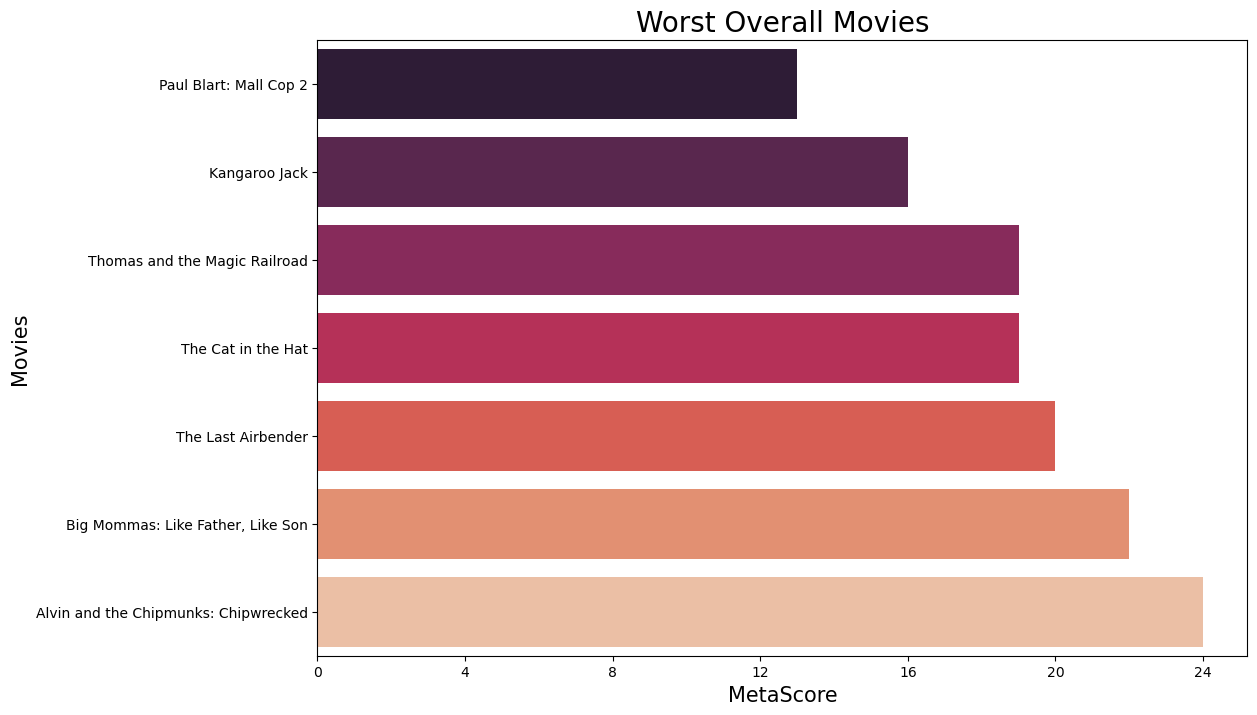

The worst movie(s) by rating: 


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
43,Madame Web,3.9,2024,PG-13,Action,S.J. Clarkson,Matt SazamaBurk SharplessClaire Parker,26.0,116.0


The worst movie(s) by MetaScore:


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
51,Nine Lives,5.3,2016,PG,Comedy,Barry Sonnenfeld,Kevin Spacey,11.0,87.0


In [34]:
# Finding, displaying and visualizing the worst overall movies
# That is, on the basis of high IMDb Rating and MetaScore
worst_overall = movies[(movies['IMDb Rating']<=4.5) & (movies['MetaScore']<=25)].sort_values('MetaScore',ascending=True)
display(worst_overall) 
plt.figure(figsize = (12,8))
sns.barplot(data = worst_overall, x= 'MetaScore', y='Title',hue='Title',palette = 'rocket',legend=False)
plt.title('Worst Overall Movies',fontsize=20)
plt.xlabel('MetaScore',fontsize=15)
plt.xticks(np.arange(0, max(worst_overall['MetaScore'])+1 , 4))
plt.ylabel('Movies',fontsize=15)
plt.show()

print('The worst movie(s) by rating: ')
display(movies[movies['IMDb Rating']==movies['IMDb Rating'].min()])
print('The worst movie(s) by MetaScore:')
display(movies[movies['MetaScore']==movies['MetaScore'].min()])

This list shows the worst overall movies, considering both Rating and MetaScore fields, making it clear that such movies were liked by neither the 
audience nor the critical analysts.
Paul Blart: Mall Cop 2 has performed the worst out of all, with a terrible MetaScore of just 13 and IMDb Rating of 4.
Also, the Genres for these movies are surprisingly Action and Adventure, implying that the movies were very bad inherently.

This is still not the worst individually where the lowest rating is 3.9 for Madame Web in terms of IMDb Rating, and 11 for Nine Lives in terms of MetaScore. 

Genre
Biography      702
Action         607
Animation      585
Drama          484
Comedy         452
Adventure      391
Documentary    236
Sci-Fi         203
Crime           78
Horror          77
Fantasy         29
Family          20
Mystery         15
History          7
Romance          4
Musical          3
Thriller         1
Reality-TV       1
Name: count, dtype: int64


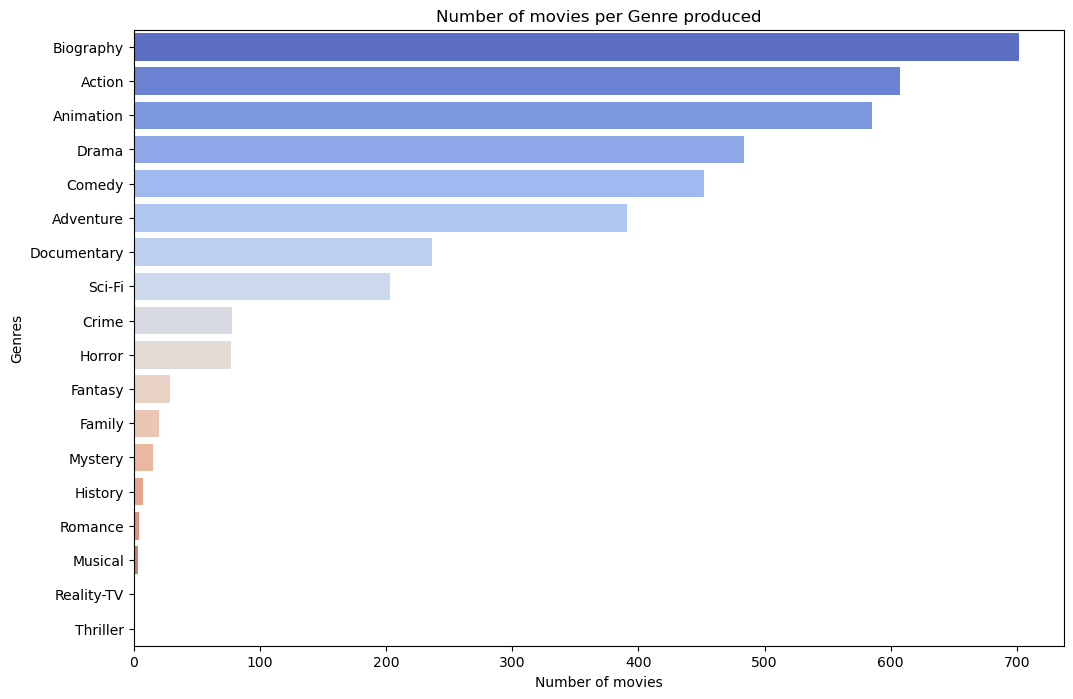

In [35]:
print(movies['Genre'].value_counts())
genres = movies.groupby('Genre')['Title'].count().reset_index(name='movie_count')
plt.figure(figsize=(12,8))
sns.barplot(data = genres.sort_values('movie_count',ascending= False), y='Genre',x='movie_count',hue= 'Genre',palette = 'coolwarm')
plt.title('Number of movies per Genre produced')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()

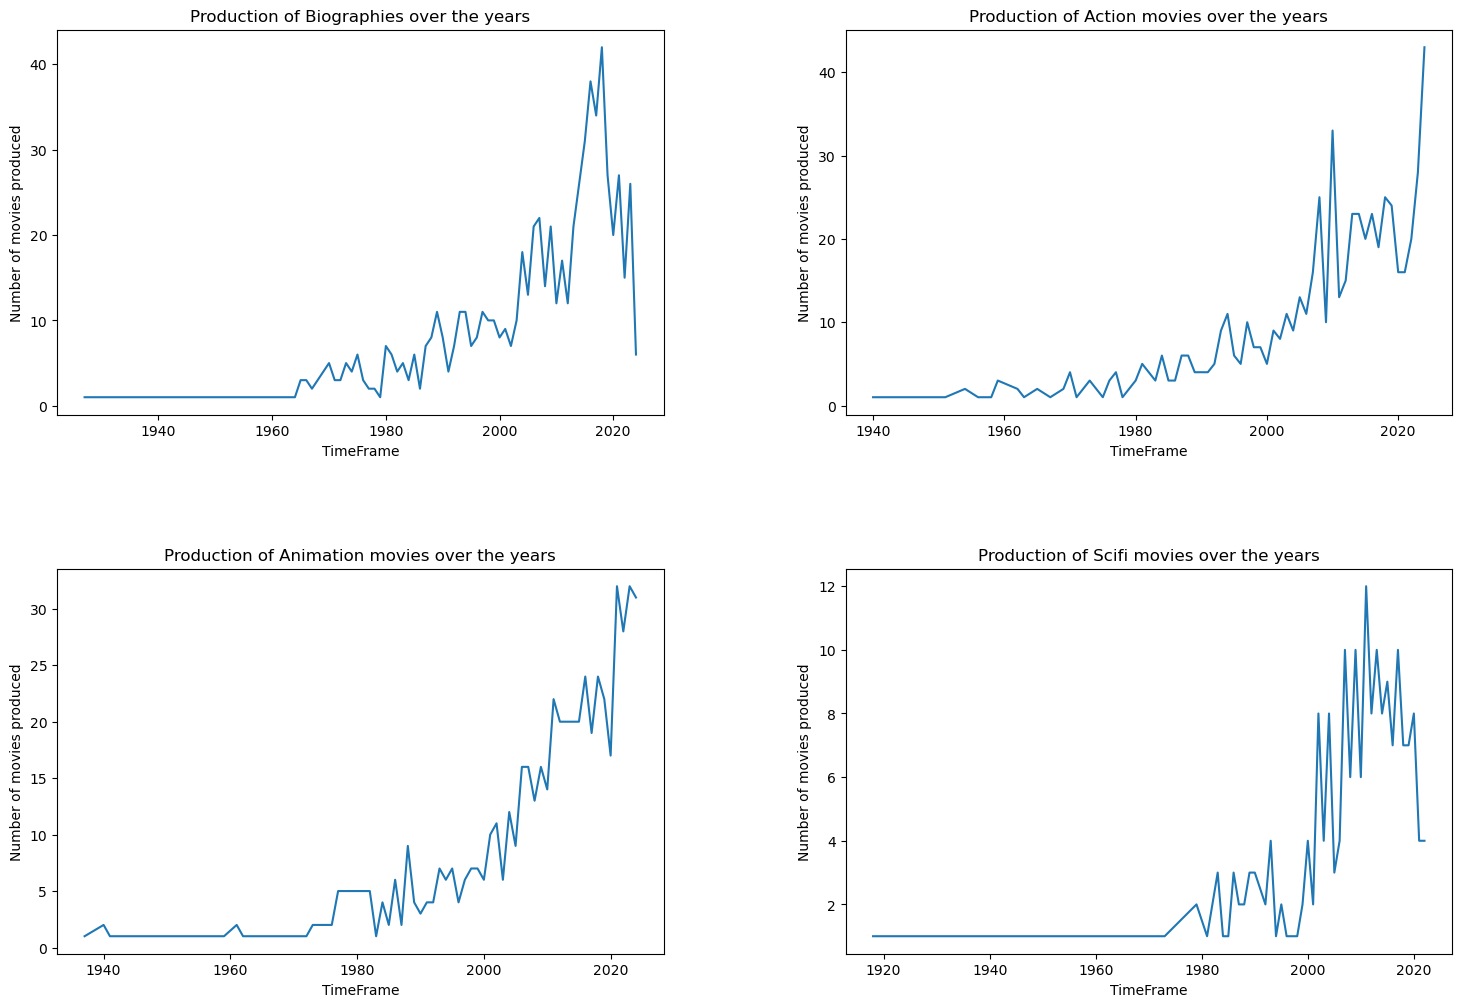

In [36]:
# Understanding the trend of production of Biographies, Action, Animation, Sci-Fi
fig,axes = plt.subplots(2,2,figsize=(18,12))
biog = movies[(movies['Genre']=='Biography') & (movies['Year']<2025)].groupby('Year').agg(movie_count = ('Title','count')).reset_index()
act = movies[(movies['Genre']=='Action') & (movies['Year']<2025)].groupby('Year').agg(movie_count = ('Title','count')).reset_index()
anim = movies[(movies['Genre']=='Animation') & (movies['Year']<2025)].groupby('Year').agg(movie_count = ('Title','count')).reset_index()
scifi = movies[(movies['Genre']=='Sci-Fi') & (movies['Year']<2025)].groupby('Year').agg(movie_count = ('Title','count')).reset_index()

# The year 2025 is excluded since we do not have enough data for it.

axes[0,0].plot('Year','movie_count',data = biog)
axes[0,0].set_title('Production of Biographies over the years')
axes[0,0].set_xlabel('TimeFrame')
axes[0,0].set_ylabel('Number of movies produced')

axes[0,1].plot('Year','movie_count',data = act)
axes[0,1].set_title('Production of Action movies over the years')
axes[0,1].set_xlabel('TimeFrame')
axes[0,1].set_ylabel('Number of movies produced')

axes[1,0].plot('Year','movie_count',data = anim)
axes[1,0].set_title('Production of Animation movies over the years')
axes[1,0].set_xlabel('TimeFrame')
axes[1,0].set_ylabel('Number of movies produced')

axes[1,1].plot('Year','movie_count',data = scifi)
axes[1,1].set_title('Production of Scifi movies over the years')
axes[1,1].set_xlabel('TimeFrame')
axes[1,1].set_ylabel('Number of movies produced')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

This shows us the trend of production of movies over the years for four Genres, Biography, Action, Animation and Sci-Fi.

It is clear from the time series plots that the production of Biographies and SciFi movies shows a dynamic trend, while that of Animation and Action movies shows a strong upward trend.

Text(0, 0.5, 'Number of movies produced')

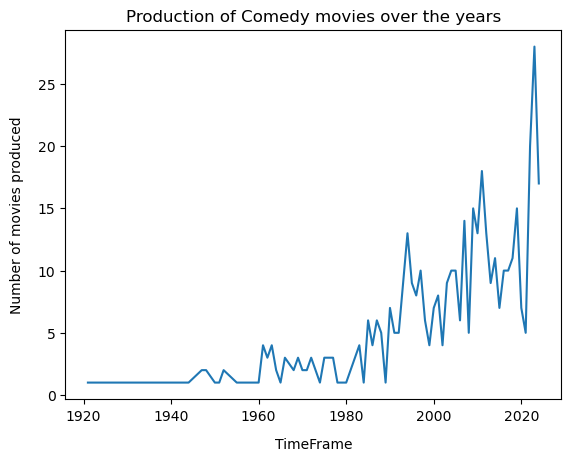

In [37]:
# Understanding the production pattern of comedy movies
comed = movies[(movies['Genre']=='Comedy') & (movies['Year']<2025)].groupby('Year').agg(movie_count = ('Title','count')).reset_index()
sns.lineplot(x='Year',y='movie_count',data = comed)
plt.title('Production of Comedy movies over the years')
plt.xlabel('TimeFrame',labelpad=10)
plt.ylabel('Number of movies produced',labelpad=10)

This plot shows the trend of production of comedy movies over the years.
There are dips as well as hikes, describing the dynamic trend. For the year 2024, the number was less than 20.

In [38]:
movies.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')

In [39]:
# Which genres are rated highest in the 21st century
df = movies[movies['Year']>=2000].groupby('Genre').agg( avg_rating = ('IMDb Rating','mean'), movie_count = ('Title','count'
)).reset_index().sort_values(by= ['avg_rating','movie_count'],ascending=[False,False])
display(df)

,Genre,avg_rating,movie_count
6,Documentary,7.409091,209
17,Thriller,7.400000,1
14,Reality-TV,7.200000,1
15,Romance,7.000000,2
3,Biography,6.955131,497
10,History,6.820000,5
13,Mystery,6.818182,11
5,Crime,6.808333,48
2,Animation,6.795435,460
7,Drama,6.786885,305


In [40]:
# Which certified movies are rated highest in the 21st century?
df_1 = movies[movies['Year']>=2000].groupby('Certificates').agg( avg_rating = ('IMDb Rating','mean'), movie_count = ('Title','count'
)).reset_index().sort_values('avg_rating',ascending=False)
display(df_1)

,Certificates,avg_rating,movie_count
5,PG-13,6.967723,505
6,R,6.817689,1255
1,G,6.812088,91
0,16+,6.800000,1
7,TV-14,6.623077,13
3,Not Rated,6.575728,103
4,PG,6.556557,732
2,NC-17,6.500000,5
13,Unrated,6.500000,5
8,TV-G,6.200000,11


In [41]:
# Which genres were rated highest in the 20th century
df_2 = movies[movies['Year']<2000].groupby('Genre').agg( avg_rating = ('IMDb Rating','mean'), movie_count = ('Title','count'
)).reset_index().sort_values('avg_rating',ascending=False)
display(df_2)

,Genre,avg_rating,movie_count
5,Crime,7.500000,30
6,Documentary,7.437037,27
10,History,7.250000,2
3,Biography,7.180488,205
2,Animation,7.067200,125
7,Drama,7.005028,179
13,Mystery,6.950000,4
12,Musical,6.900000,1
11,Horror,6.845455,11
0,Action,6.659184,147


In [42]:
# Which certified movies were rated highest in the 20th century?
df_3 = movies[movies['Year']<2000].groupby('Certificates').agg( avg_rating = ('IMDb Rating','mean'), movie_count = ('Title','count'
)).reset_index().sort_values('avg_rating',ascending=False)
display(df_3)

,Certificates,avg_rating,movie_count
4,Not Rated,7.800000,12
2,M/PG,7.400000,1
9,TV-14,7.333333,3
0,Approved,7.255102,49
7,Passed,7.250000,2
1,G,7.101190,168
10,TV-PG,7.000000,1
6,PG-13,6.897917,96
11,Unrated,6.766667,3
5,PG,6.735569,343


,Star Cast,avg_rating,count
3209,Tom Hanks,7.760000,5
710,Daniel Radcliffe,7.670000,10
1695,Johnny Depp,6.860000,5
711,Daniel RadcliffeEmma WatsonRupert Grint,6.805714,140
29,Adam Sandler,6.580000,5
3349,Will Ferrell,6.550000,6
1587,Jim Carrey,6.540000,5
3056,Steve Carell,6.500000,7
1360,Jack Black,6.457143,7
325,Ben Stiller,6.420000,5


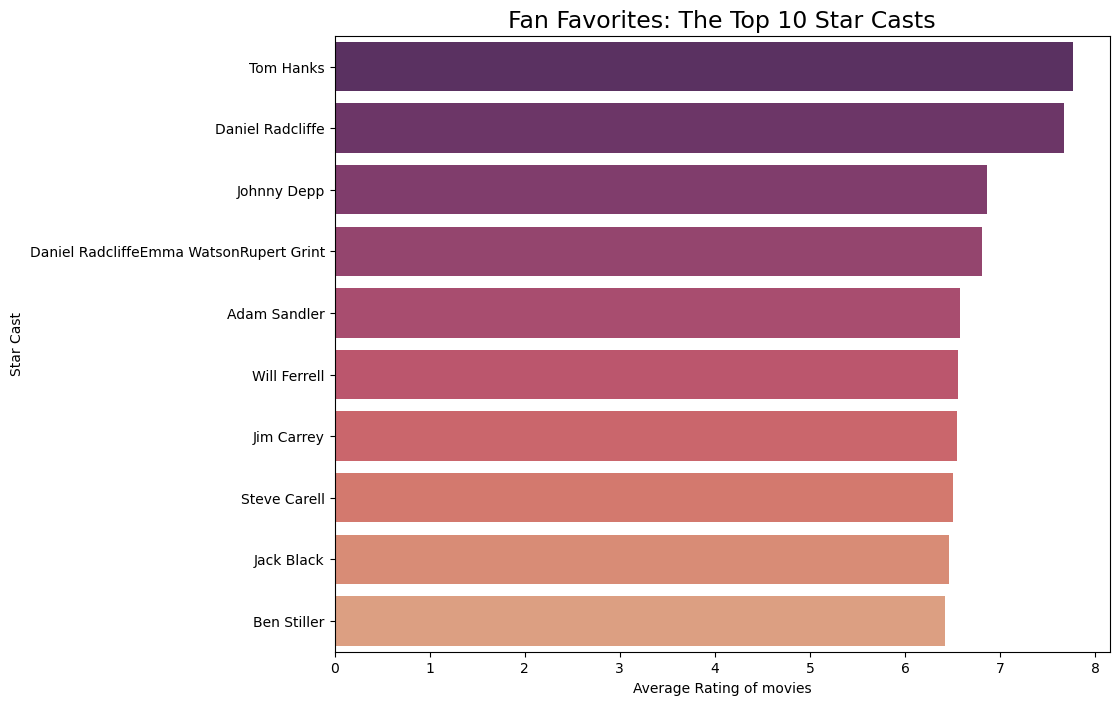

In [43]:
# Finding the Star Cast that are fan-favorites
sc = movies.groupby('Star Cast').agg(avg_rating = ('IMDb Rating','mean') ,count =  ('Title','count')).reset_index(
).sort_values(by='avg_rating',ascending=False).drop_duplicates()
sc_1 = sc[sc['count']>=5]
display(sc_1.head(10))

plt.figure(figsize= (10,8))
sns.barplot(x='avg_rating',y='Star Cast',data = sc_1.head(10),hue='Star Cast',palette='flare_r')
plt.title('Fan Favorites: The Top 10 Star Casts',fontsize=17)
plt.xlabel('Average Rating of movies')
plt.ylabel('Star Cast')
plt.show()

This list shows the highest rated Star Cast, considering a minimum of 5 movies starred by them.

We see that Tom Hanks tops this list with an avg rating of 7.76, followed closely by Daniel Radcliffe with 7.67.
Daniel Radcliffe, Emma Watson, Rupert Grint together have performed really well with an avg rating of 6.8, especially considering that they have starred 140 movies.

,Star Cast,avg_rating,count
885,Eddie Murphy,5.266667,6
3170,Tim Allen,5.366667,6
2803,Robin Williams,5.633333,6
1374,Jackie Chan,5.740000,5
412,Brendan Fraser,5.800000,5
872,Dwayne Johnson,6.040000,5
2554,Owen Wilson,6.100000,6
198,Anna Kendrick,6.140000,5
2128,Macaulay Culkin,6.200000,5
2347,Michael J. Fox,6.240000,5


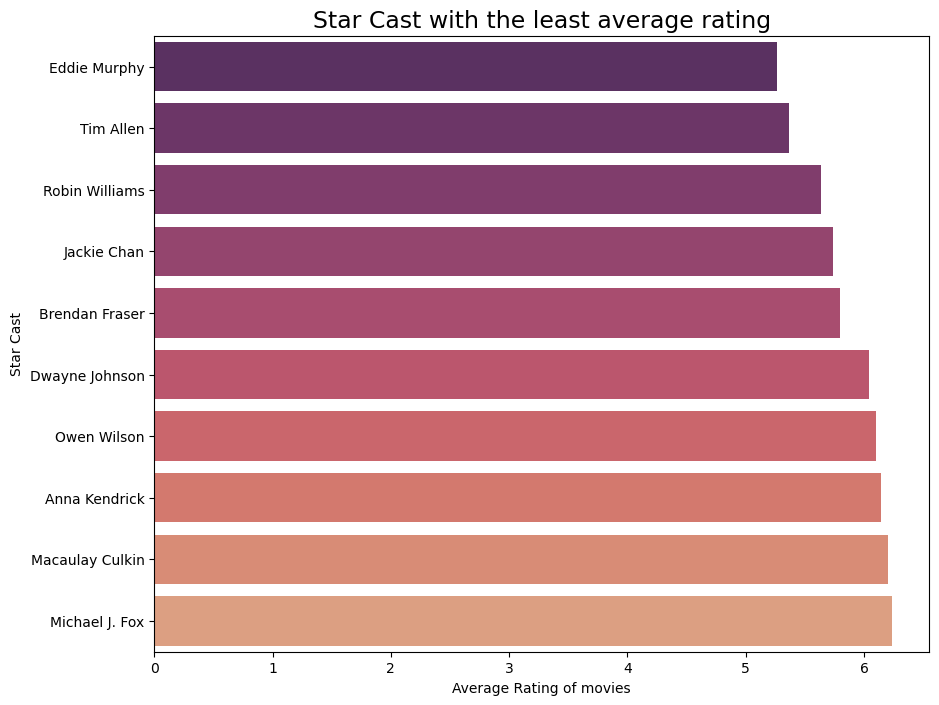

In [44]:
# Finding the Star Cast whose movies were least rated
sc = movies.groupby('Star Cast').agg(avg_rating = ('IMDb Rating','mean') ,count =  ('Title','count')).reset_index(
).sort_values(by='avg_rating',ascending=True).drop_duplicates()
sc_1 = sc[sc['count']>=5]
display(sc_1.head(10))

plt.figure(figsize= (10,8))
sns.barplot(x='avg_rating',y='Star Cast',data = sc_1.head(10),hue='Star Cast',palette='flare_r')
plt.title('Star Cast with the least average rating',fontsize=17)
plt.xlabel('Average Rating of movies')
plt.ylabel('Star Cast')
plt.show()

We can infer from this plot that on average, Eddie Murphy has starred the least rated movies on average (we are considering a minimum of 5 movies to get these results), followed closely by Tim Allen.
Popular figures like Dwayne Johnson and Jackie Chan have also performed poorly according to this dataset.

In [45]:
movies['Genre'].value_counts()

Genre
Biography      702
Action         607
Animation      585
Drama          484
Comedy         452
Adventure      391
Documentary    236
Sci-Fi         203
Crime           78
Horror          77
Fantasy         29
Family          20
Mystery         15
History          7
Romance          4
Musical          3
Thriller         1
Reality-TV       1
Name: count, dtype: int64



The following 5 cells show the top rated movies for Five Genres, namely, Biography, Animation, Action, Comedy and Sci-Fi, helping viewers and analysts to understand the movie trends for these Genres.

,Title,IMDb Rating,Genre,MetaScore
742,Schindler's List,9.0,Biography,95.0
3163,12th Fail,8.9,Biography,66.0
125,Goodfellas,8.7,Biography,92.0
719,The Pianist,8.5,Biography,85.0
732,Amadeus,8.4,Biography,87.0
1680,Karim Patwa's Spaceship,8.3,Biography,66.0
748,Oppenheimer,8.3,Biography,90.0
739,Braveheart,8.3,Biography,68.0
706,Hamilton,8.3,Biography,88.0
221,The Lion of the Desert,8.2,Biography,66.0


,Title,IMDb Rating,Genre,MetaScore
468,My Left Foot,7.8,Biography,97.0
686,12 Years a Slave,8.1,Biography,96.0
742,Schindler's List,9.0,Biography,95.0
710,The Social Network,7.8,Biography,95.0
705,The Irishman,7.8,Biography,94.0
21,The Wild Child,7.5,Biography,94.0
281,Mr. Turner,6.8,Biography,94.0
680,Spotlight,8.1,Biography,93.0
330,Reversal of Fortune,7.2,Biography,93.0
290,The Diving Bell and the Butterfly,8.0,Biography,92.0


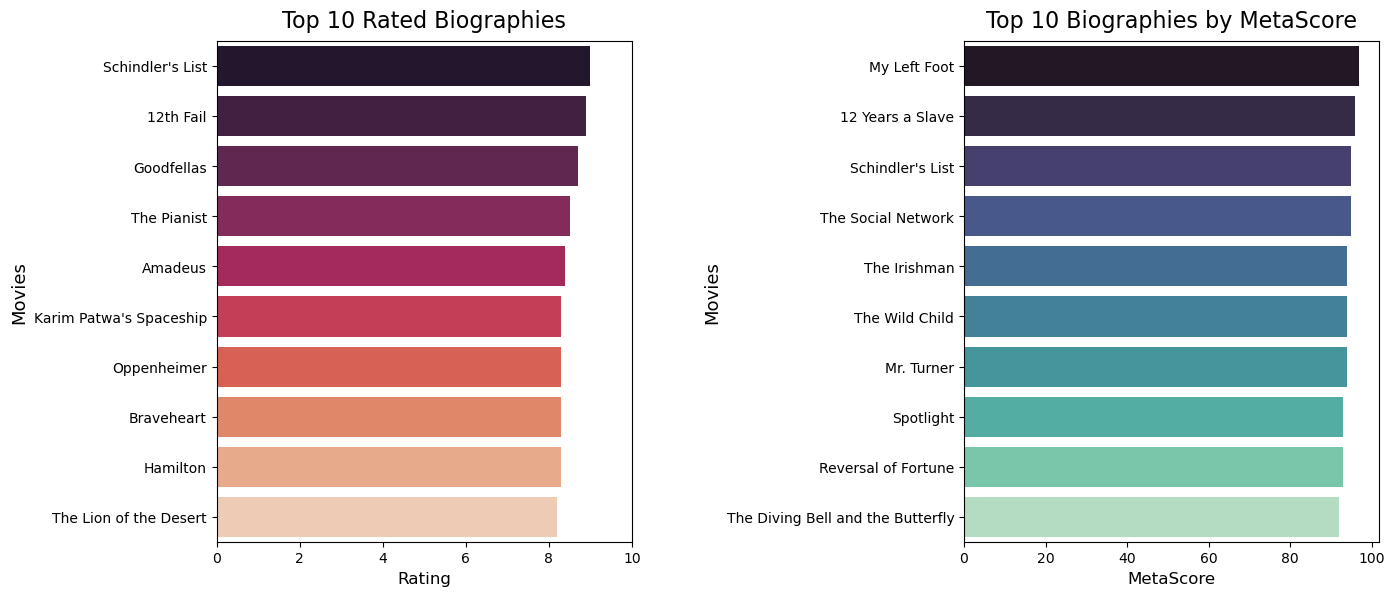

In [46]:
# Top 10 Biographies - rating and metascore wise
# This is for general viewers and critical analysis
biogs = movies[movies['Genre']=='Biography']

display(biogs[['Title','IMDb Rating','Genre','MetaScore']].sort_values('IMDb Rating',ascending=False).head(10))
display(biogs[['Title','IMDb Rating','Genre','MetaScore']].sort_values('MetaScore',ascending=False).head(10))

fig,axes = plt.subplots(1,2,figsize=(15,6.5))
sns.barplot(data = biogs.sort_values('IMDb Rating',ascending=False).head(10) , x='IMDb Rating',y='Title',ax=axes[0],palette='rocket',hue='Title')
axes[0].set_title('Top 10 Rated Biographies',fontsize=16,pad=10)
axes[0].set_xlabel('Rating',fontsize=12)
axes[0].set_ylabel('Movies',fontsize=13)
axes[0].set_xticks(np.arange(0 ,11, 2))

sns.barplot(data = biogs.sort_values('MetaScore',ascending=False).head(10), x='MetaScore',y='Title',ax=axes[1],palette='mako',hue='Title')
axes[1].set_title('Top 10 Biographies by MetaScore',fontsize=16,pad=10)
axes[1].set_xlabel('MetaScore',fontsize=12)
axes[1].set_ylabel('Movies',fontsize=13)

plt.subplots_adjust(wspace=0.8)
plt.show()

,Title,IMDb Rating,Genre,MetaScore
1039,The Lord of the Rings: The Return of the King,9.0,Action,94.0
130,The Dark Knight,9.0,Action,84.0
85,The Message,8.9,Action,66.0
15,The Lord of the Rings: The Fellowship of the Ring,8.9,Action,92.0
1515,Captain Callum Explores the Universe,8.8,Action,66.0
14,Inception,8.8,Action,74.0
976,Saving for the Day,8.8,Action,66.0
1031,The Lord of the Rings: The Two Towers,8.8,Action,87.0
211,The Matrix,8.7,Action,73.0
3153,Star Wars: Episode V - The Empire Strikes Back,8.7,Action,82.0


,Title,IMDb Rating,Genre,MetaScore
3141,Seven Samurai,8.6,Action,98.0
1131,North by Northwest,8.3,Action,98.0
1039,The Lord of the Rings: The Return of the King,9.0,Action,94.0
2896,Dunkirk,7.8,Action,94.0
15,The Lord of the Rings: The Fellowship of the Ring,8.9,Action,92.0
3147,Star Wars: Episode IV - A New Hope,8.6,Action,90.0
45,Mad Max: Fury Road,8.1,Action,90.0
2750,United 93,7.6,Action,90.0
2782,Letters from Iwo Jima,7.8,Action,89.0
1031,The Lord of the Rings: The Two Towers,8.8,Action,87.0


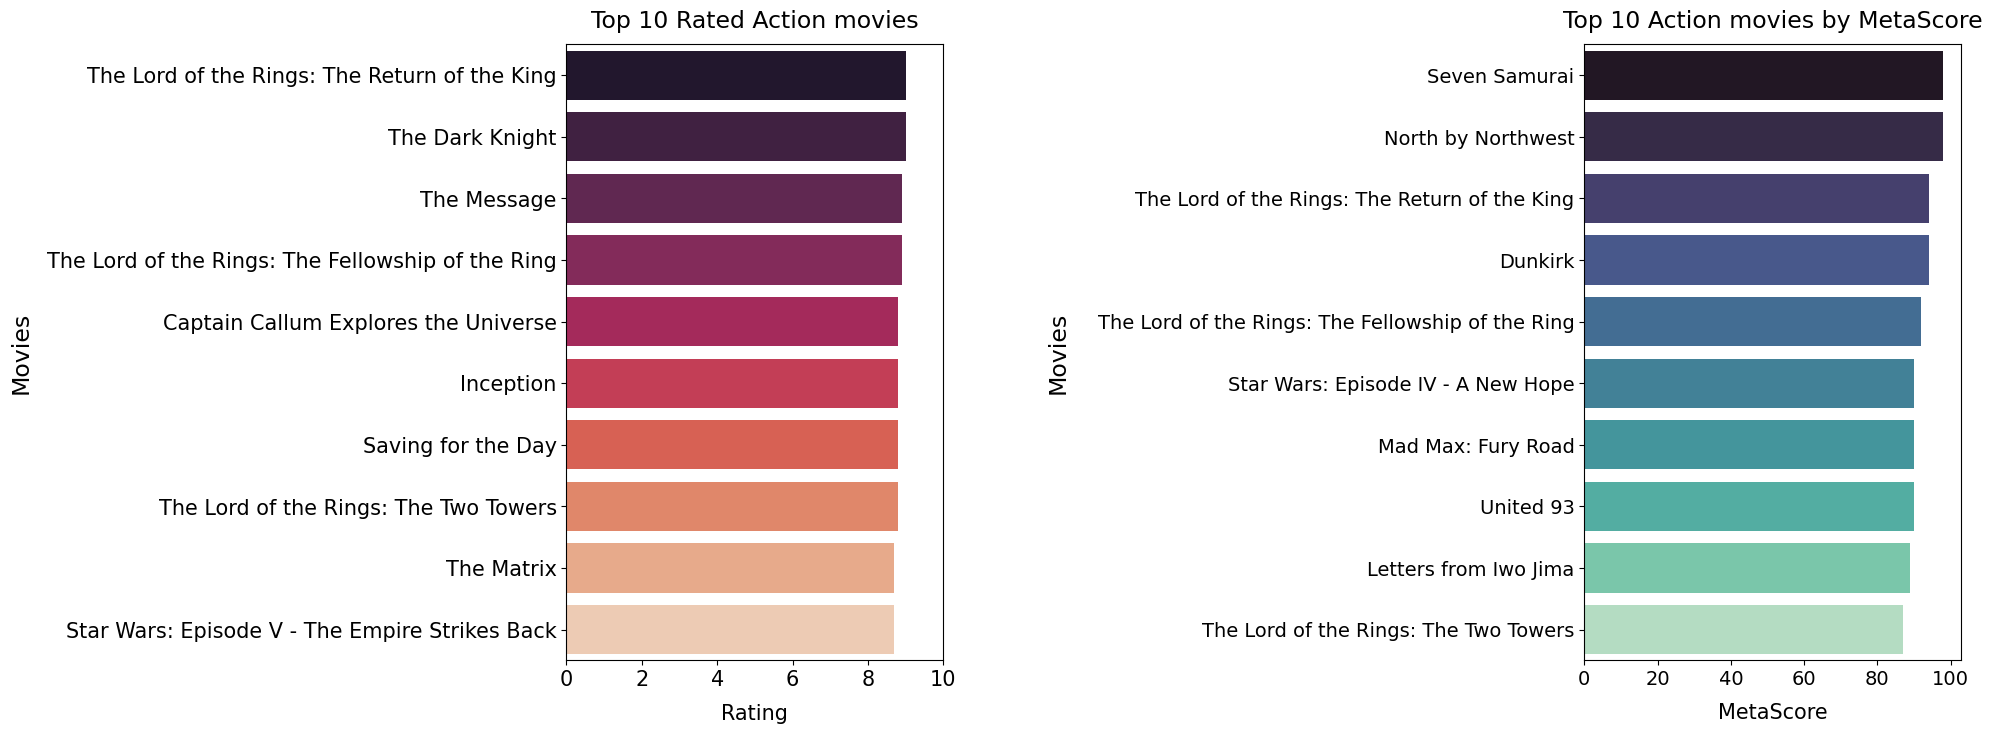

In [47]:
# Top 10 Action movies
acts = movies[movies['Genre']=='Action']

display(acts[['Title','IMDb Rating','Genre','MetaScore']].sort_values('IMDb Rating',ascending=False).head(10))
display(acts[['Title','IMDb Rating','Genre','MetaScore']].sort_values('MetaScore',ascending=False).head(10))

fig,axes = plt.subplots(1,2,figsize=(18,8))
sns.barplot(data = acts.sort_values('IMDb Rating',ascending=False).head(10), x='IMDb Rating',y='Title',ax=axes[0],palette='rocket',hue='Title')
axes[0].set_title('Top 10 Rated Action movies',fontsize=17,pad=12)
axes[0].set_xlabel('Rating',fontsize=15,labelpad=10)
axes[0].set_ylabel('Movies',fontsize=17,labelpad=10)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_xticks(np.arange(0 ,11, 2))

sns.barplot(data = acts.sort_values('MetaScore',ascending=False).head(10), x='MetaScore',y='Title',ax=axes[1],palette='mako',hue='Title')
axes[1].set_title('Top 10 Action movies by MetaScore',fontsize=17,pad=12)
axes[1].set_xlabel('MetaScore',fontsize=15,labelpad=10)
axes[1].set_ylabel('Movies',fontsize=17,labelpad=20)
axes[1].tick_params(axis='both', labelsize=14)

plt.subplots_adjust(wspace=1.7)
plt.show()

,Title,IMDb Rating,Genre,MetaScore
92,Spider-Man: Across the Spider-Verse,8.6,Animation,86.0
978,Spirited Away,8.6,Animation,96.0
83,The Lion King,8.5,Animation,88.0
3120,Grave of the Fireflies,8.5,Animation,94.0
942,Spider-Man: Into the Spider-Verse,8.4,Animation,87.0
637,The Day the Earth Blew Up: A Looney Tunes Movie,8.4,Animation,57.1
939,WALL·E,8.4,Animation,95.0
61,Coco,8.4,Animation,81.0
73,Your Name.,8.4,Animation,81.0
3075,Toy Story 3,8.3,Animation,92.0


,Title,IMDb Rating,Genre,MetaScore
529,Pinocchio,7.5,Animation,99.0
75,Ratatouille,8.1,Animation,96.0
58,Toy Story,8.3,Animation,96.0
86,Spirited Away,8.6,Animation,96.0
694,Snow White and the Seven Dwarfs,7.6,Animation,96.0
683,Fantasia,7.7,Animation,96.0
420,Dumbo,7.2,Animation,96.0
881,Beauty and the Beast,8.0,Animation,95.0
939,WALL·E,8.4,Animation,95.0
7,Inside Out,8.1,Animation,94.0


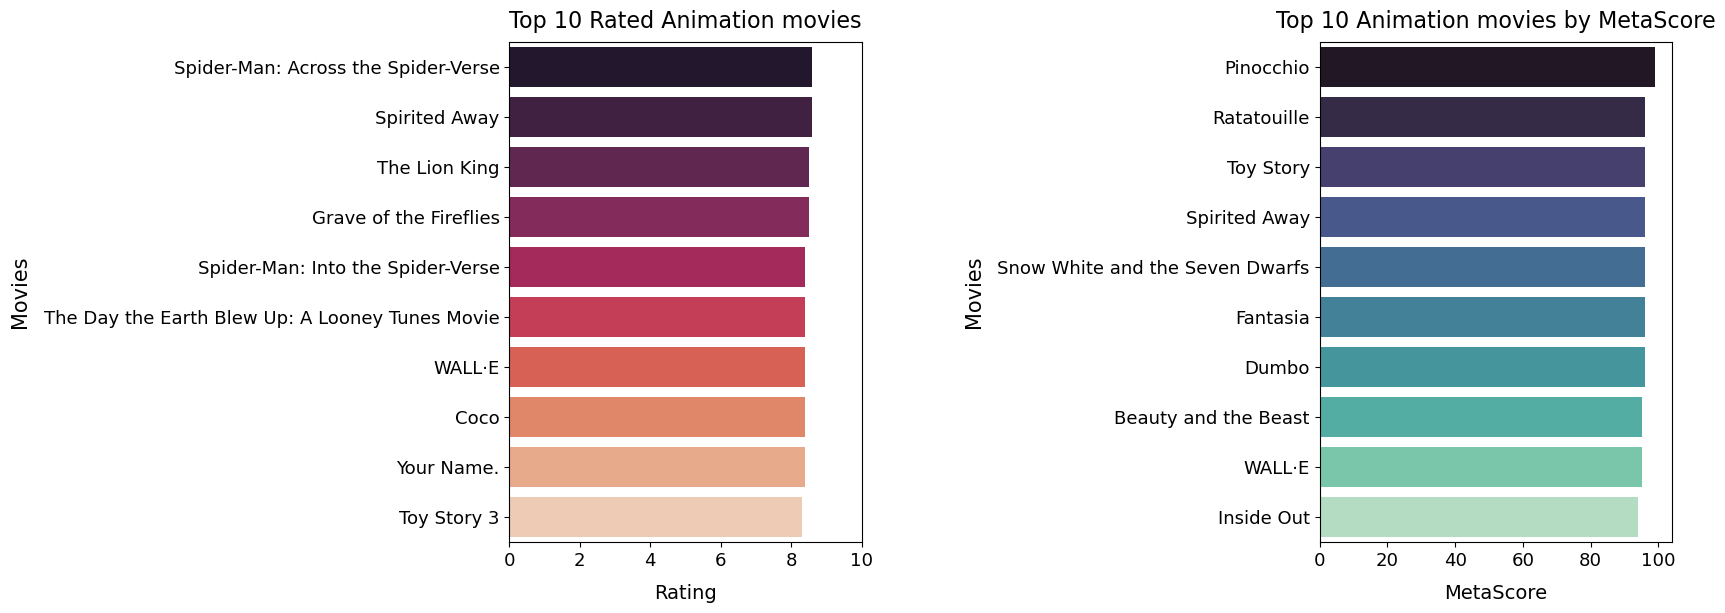

In [48]:
# Top 10 animation movies
anims = movies[movies['Genre']=='Animation']

display(anims[['Title','IMDb Rating','Genre','MetaScore']].sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10))
display(anims[['Title','IMDb Rating','Genre','MetaScore']].sort_values('MetaScore',ascending=False).drop_duplicates().head(10))

fig,axes = plt.subplots(1,2,figsize=(15,6.5))
( sns.barplot(data = anims[['Title','IMDb Rating','Genre','MetaScore']]
              .sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10)
              , x='IMDb Rating',y='Title',ax=axes[0],palette='rocket',hue='Title'))
axes[0].set_title('Top 10 Rated Animation movies',fontsize=16,pad=10)
axes[0].set_xlabel('Rating',fontsize=14,labelpad=10)
axes[0].set_ylabel('Movies',fontsize=15,labelpad=10)
axes[0].tick_params(axis='both', labelsize=13)
axes[0].set_xticks(np.arange(0 ,11, 2))

(sns.barplot(data = anims[['Title','IMDb Rating','Genre','MetaScore']]
             .sort_values('MetaScore',ascending=False).drop_duplicates().head(10)
             , x='MetaScore',y='Title',ax=axes[1],palette='mako',hue='Title'))
axes[1].set_title('Top 10 Animation movies by MetaScore',fontsize=16,pad=10)
axes[1].set_xlabel('MetaScore',fontsize=14,labelpad=10)
axes[1].set_ylabel('Movies',fontsize=15,labelpad=10)
axes[1].tick_params(axis='both', labelsize=13)

plt.subplots_adjust(wspace=1.3)
plt.show()

,Title,IMDb Rating,Genre,MetaScore
1719,Lo que pudo ser 2084,8.6,Sci-Fi,66.0
1900,Arrows of Time,8.6,Sci-Fi,66.0
1155,Futurus - Robot contro uomini,8.5,Sci-Fi,66.0
1765,Edgar Allan Poe's Plan 13: The House of Elvis,8.5,Sci-Fi,66.0
1761,The Reflection of Kripto,8.5,Sci-Fi,66.0
1627,The Battle for First Chair Opening Day Dreams ...,8.5,Sci-Fi,66.0
1985,Ratherman,8.5,Sci-Fi,66.0
1617,Inseguito,8.5,Sci-Fi,66.0
1923,Emocean,8.3,Sci-Fi,66.0
1542,Plan 17: The Purple King,8.2,Sci-Fi,66.0


,Title,IMDb Rating,Genre,MetaScore
994,Lola,6.4,Sci-Fi,70.0
1737,Slaveworld,7.2,Sci-Fi,66.0
1717,New Machine: Ulemae 5,6.7,Sci-Fi,66.0
1719,Lo que pudo ser 2084,8.6,Sci-Fi,66.0
1721,Vitaminac,5.4,Sci-Fi,66.0
1723,Invertebrate,7.5,Sci-Fi,66.0
1726,Double Happiness Uranium,5.0,Sci-Fi,66.0
1728,Absolute Zero,5.6,Sci-Fi,66.0
1730,Sturmaz (Acto y tempestad),7.2,Sci-Fi,66.0
1733,Green Eyes for Anastice,7.2,Sci-Fi,66.0


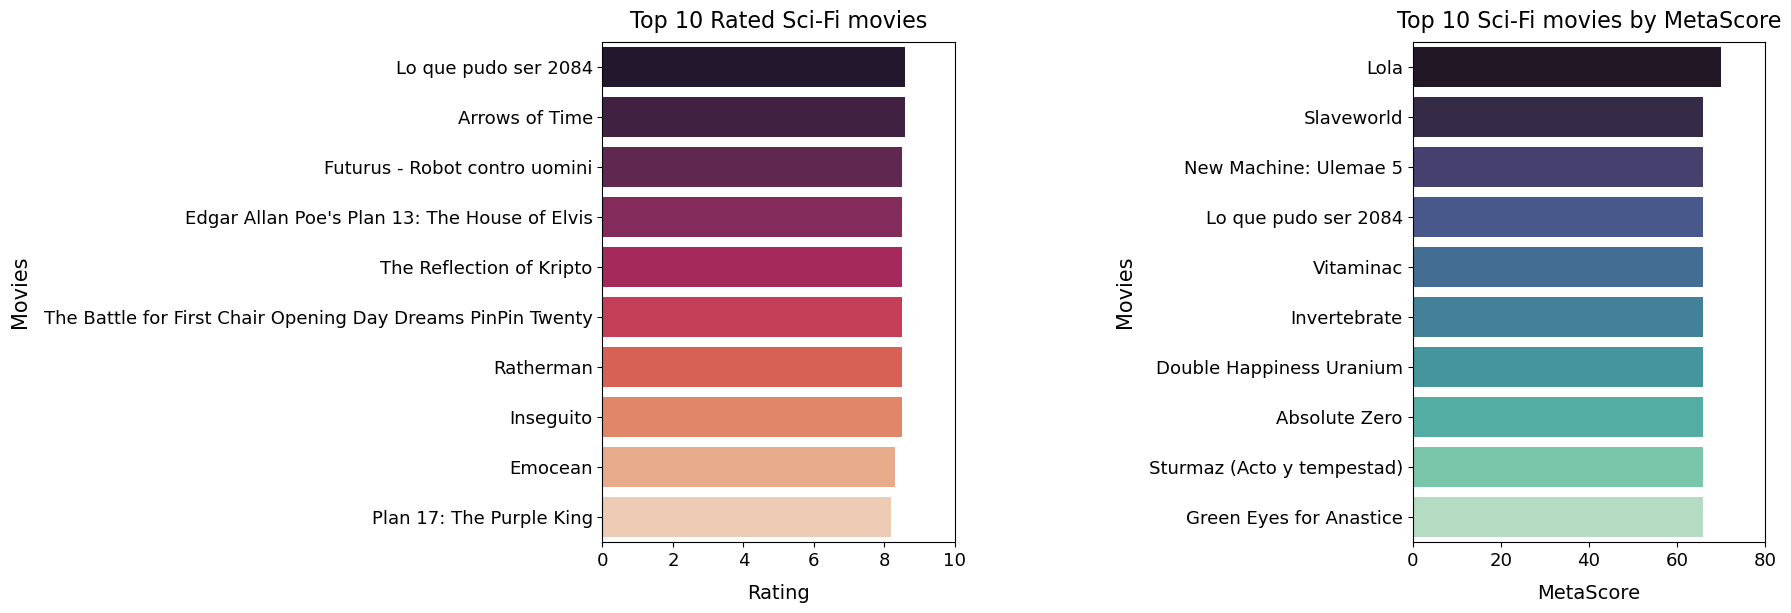

In [49]:
# Top 10 Sci-Fi movies
scif = movies[movies['Genre']=='Sci-Fi']

display(scif[['Title','IMDb Rating','Genre','MetaScore']].sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10))
display(scif[['Title','IMDb Rating','Genre','MetaScore']].sort_values('MetaScore',ascending=False).drop_duplicates().head(10))

fig,axes = plt.subplots(1,2,figsize=(15,6.5))
( sns.barplot(data = scif[['Title','IMDb Rating','Genre','MetaScore']]
              .sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10)
              , x='IMDb Rating',y='Title',ax=axes[0],palette='rocket',hue='Title'))
axes[0].set_title('Top 10 Rated Sci-Fi movies',fontsize=16,pad=10)
axes[0].set_xlabel('Rating',fontsize=14,labelpad=10)
axes[0].set_ylabel('Movies',fontsize=15,labelpad=10)
axes[0].tick_params(axis='both', labelsize=13)
axes[0].set_xticks(np.arange(0 ,11, 2))

(sns.barplot(data = scif[['Title','IMDb Rating','Genre','MetaScore']]
             .sort_values('MetaScore',ascending=False).drop_duplicates().head(10)
             , x='MetaScore',y='Title',ax=axes[1],palette='mako',hue='Title'))
axes[1].set_title('Top 10 Sci-Fi movies by MetaScore',fontsize=16,pad=10)
axes[1].set_xlabel('MetaScore',fontsize=14,labelpad=10)
axes[1].set_ylabel('Movies',fontsize=15,labelpad=10)
axes[1].tick_params(axis='both', labelsize=13)
axes[1].set_xticks(np.arange(0 ,max(scif['MetaScore'])+21, 20))

plt.subplots_adjust(wspace=1.3)
plt.show()

,Title,IMDb Rating,Genre,MetaScore
1710,Marty's Project,9.5,Comedy,66.0
1224,Fast Shark III: Fastest Shark,9.0,Comedy,66.0
3142,Life Is Beautiful,8.6,Comedy,58.0
384,Laapataa Ladies,8.5,Comedy,66.9
3117,City Lights,8.5,Comedy,99.0
3130,Django Unchained,8.5,Comedy,81.0
3121,The Intouchables,8.5,Comedy,57.0
3118,Modern Times,8.5,Comedy,96.0
1885,Gargaroth,8.4,Comedy,66.0
1438,The Phantom Lake Kids in the Unseen Invasion,8.4,Comedy,66.0


,Title,IMDb Rating,Genre,MetaScore
3074,Singin' in the Rain,8.3,Comedy,99.0
3117,City Lights,8.5,Comedy,99.0
3076,Dr. Strangelove or: How I Learned to Stop Worr...,8.3,Comedy,97.0
3118,Modern Times,8.5,Comedy,96.0
367,Meet Me in St. Louis,7.5,Comedy,94.0
3032,Gosford Park,7.2,Comedy,90.0
372,Anora,7.9,Comedy,89.0
239,Poor Things,7.9,Comedy,88.0
175,Miracle on 34th Street,7.9,Comedy,88.0
2879,The Death of Stalin,7.3,Comedy,88.0


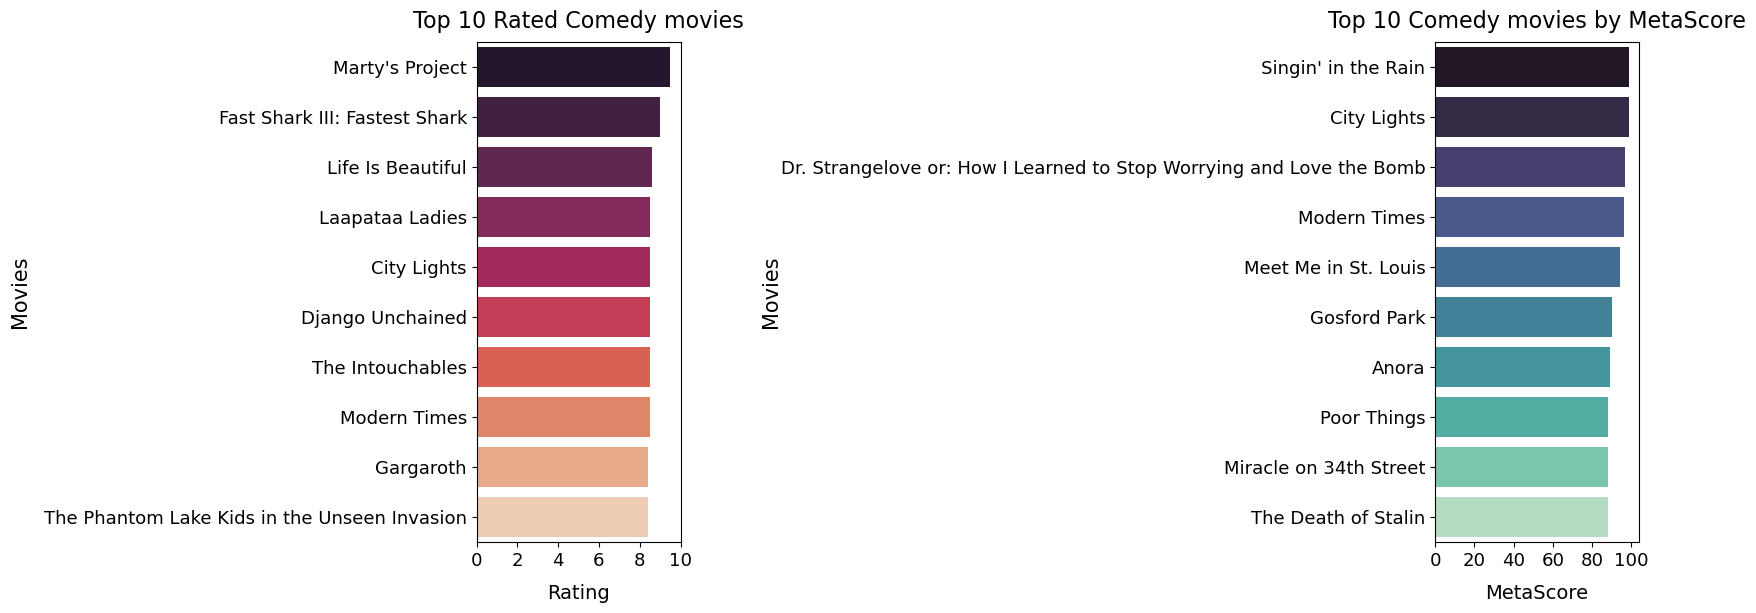

In [50]:
# Top 10 Comedy movies
comd = movies[movies['Genre']=='Comedy']

display(comd[['Title','IMDb Rating','Genre','MetaScore']].sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10))
display(comd[['Title','IMDb Rating','Genre','MetaScore']].sort_values('MetaScore',ascending=False).drop_duplicates().head(10))

fig,axes = plt.subplots(1,2,figsize=(15,6.5))
( sns.barplot(data = comd[['Title','IMDb Rating','Genre','MetaScore']]
              .sort_values('IMDb Rating',ascending=False).drop_duplicates().head(10)
              , x='IMDb Rating',y='Title',ax=axes[0],palette='rocket',hue='Title'))
axes[0].set_title('Top 10 Rated Comedy movies',fontsize=16,pad=10)
axes[0].set_xlabel('Rating',fontsize=14,labelpad=10)
axes[0].set_ylabel('Movies',fontsize=15,labelpad=10)
axes[0].tick_params(axis='both', labelsize=13)
axes[0].set_xticks(np.arange(0 ,11, 2))

(sns.barplot(data = comd[['Title','IMDb Rating','Genre','MetaScore']]
             .sort_values('MetaScore',ascending=False).drop_duplicates().head(10)
             , x='MetaScore',y='Title',ax=axes[1],palette='mako',hue='Title'))
axes[1].set_title('Top 10 Comedy movies by MetaScore',fontsize=16,pad=10)
axes[1].set_xlabel('MetaScore',fontsize=14,labelpad=10)
axes[1].set_ylabel('Movies',fontsize=15,labelpad=0)
axes[1].tick_params(axis='both', labelsize=13)
axes[1].set_xticks(np.arange(0 ,101, 20))

plt.subplots_adjust(wspace=3.7)
plt.show()

,Title,Genre,IMDb Rating,Certificates
0,The Dark Knight,Action,9.0,PG-13
1,The Lord of the Rings: The Return of the King,Action,9.0,PG-13
2,Fuga dalla Morte,Adventure,9.2,R
3,Spirited Away,Animation,8.6,PG
4,Spider-Man: Across the Spider-Verse,Animation,8.6,PG
5,Spirited Away,Animation,8.6,PG
6,Schindler's List,Biography,9.0,R
7,Marty's Project,Comedy,9.5,R
8,The Godfather,Crime,9.2,R
9,The People's Story,Documentary,9.5,PG


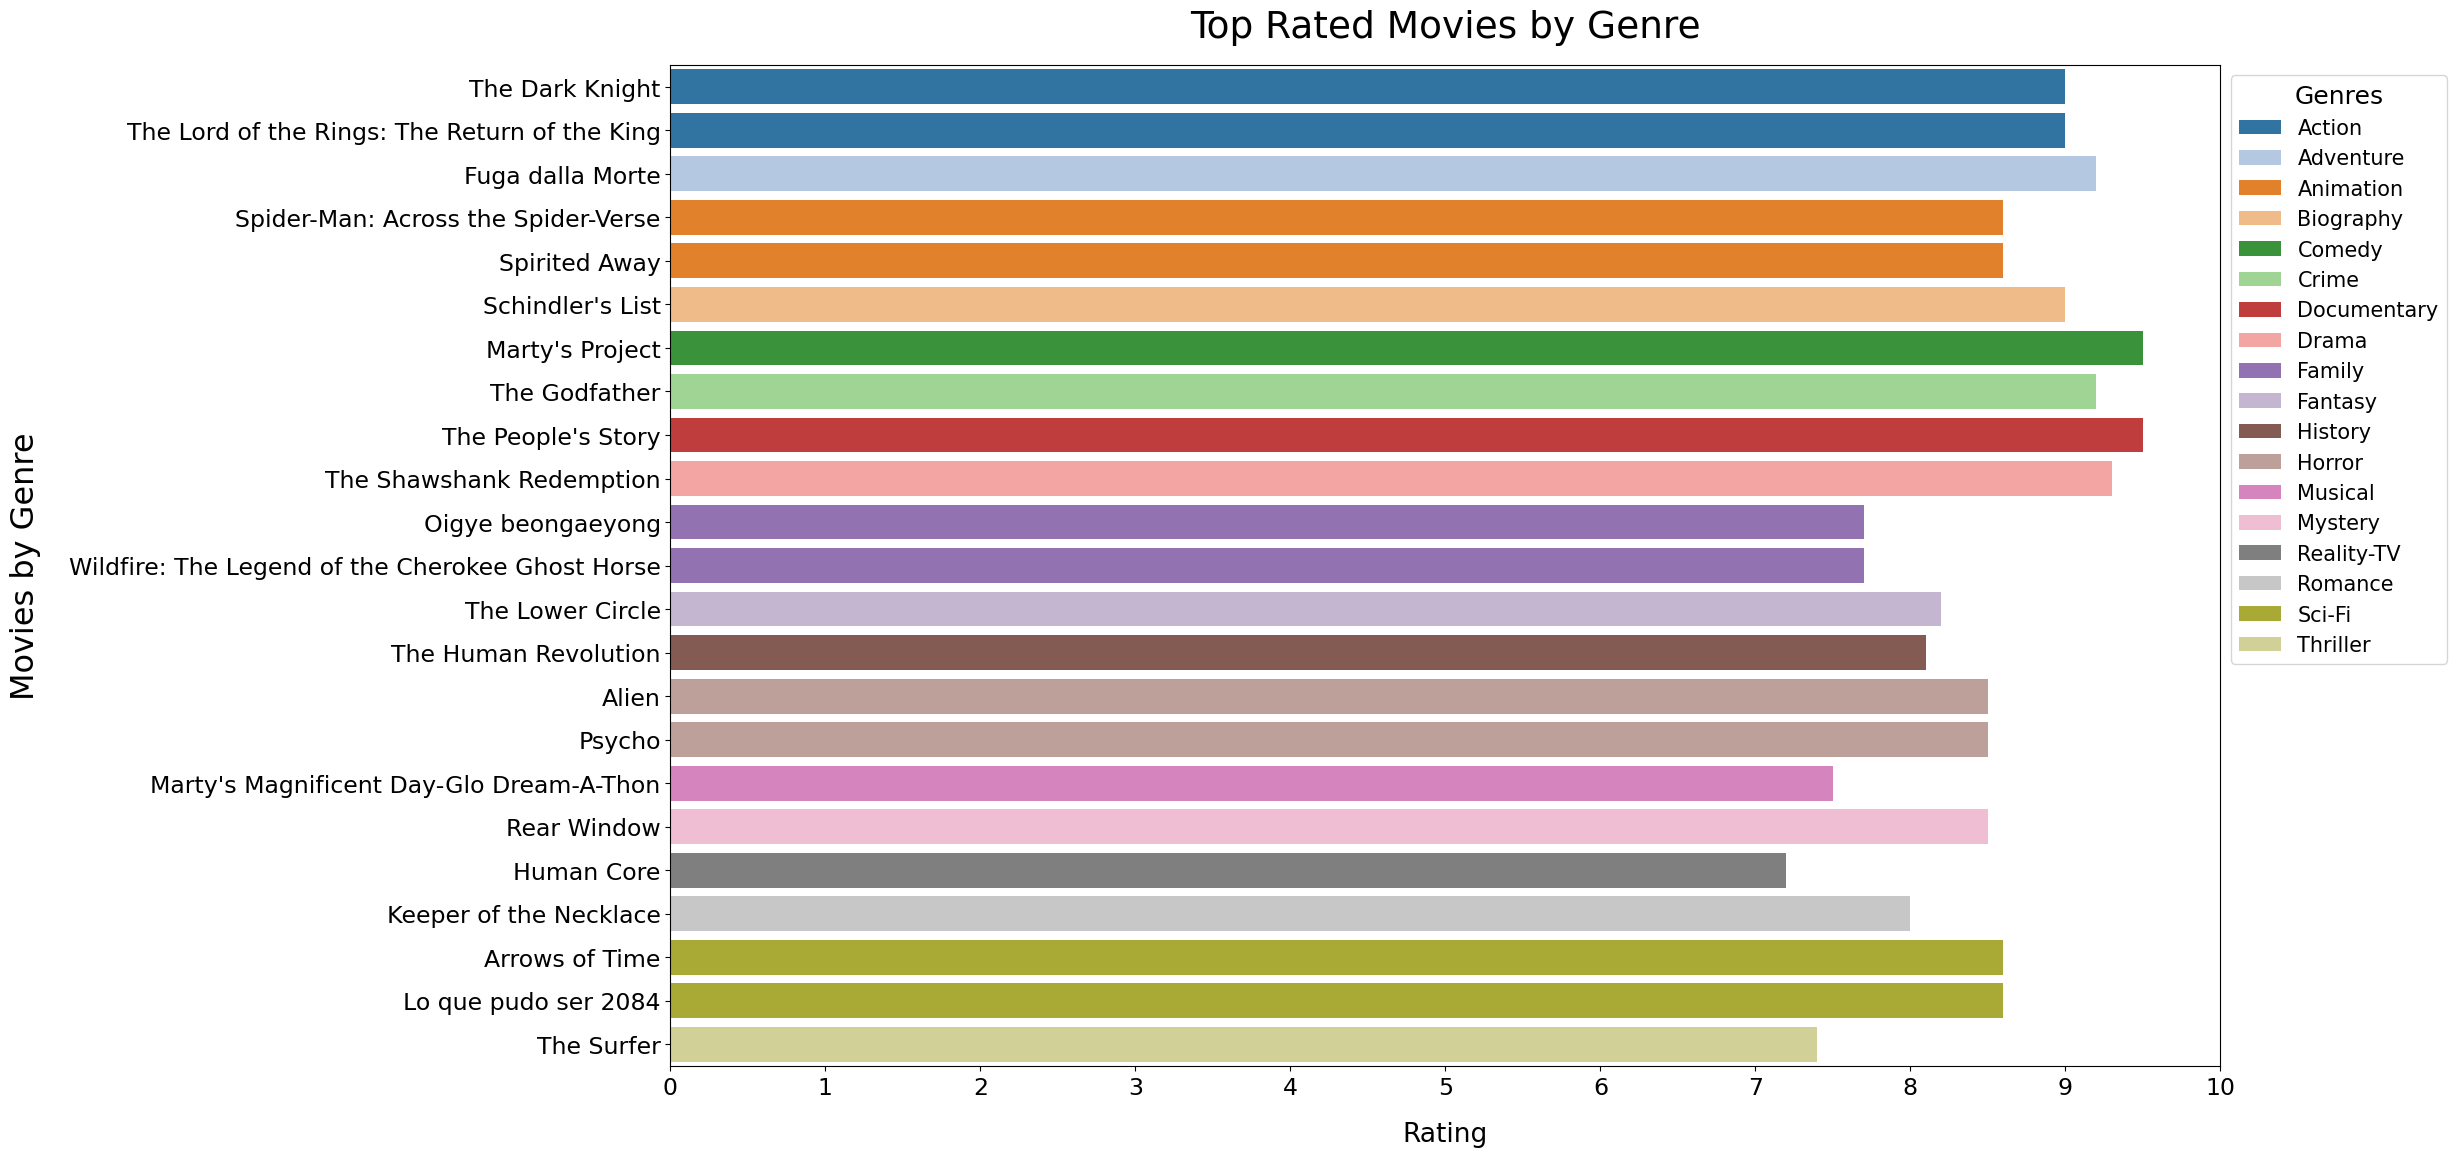

In [51]:
# Finding the top rated movie Genre-wise
# top_rated = movies.groupby('Genre').agg(Rating = ('IMDb Rating','max') , movie_name = ('Title','first')).reset_index() 
# The above code can be used for finding only one movie per genre with the highest rating

# But here, multiple movies are possible
top_rated = movies.groupby(['Genre'])[['Title','Genre','IMDb Rating','Certificates']].apply(lambda x: x[x['IMDb Rating'] == x['IMDb Rating'].max()] 
            ).reset_index(drop=True)
# lambda is an unnamed function --> lambda [arguments] = [expressions]
# lambda x: is part of a lambda function that's applied to each group when using .groupby() + .apply()
# x is a temporary variable that represents each genre group
display(top_rated)
top_rated= top_rated.drop_duplicates().sort_values('IMDb Rating',ascending=False)
plt.figure(figsize=(20,13))
sns.barplot(data= top_rated.sort_values('Genre'), y='Title',hue='Genre',palette= 'tab20', x='IMDb Rating')
plt.legend(title = 'Genres',bbox_to_anchor= (1.0,1.0),fontsize=15,title_fontsize=18)
plt.title('Top Rated Movies by Genre',fontsize=27,pad=20)
plt.ylabel('Movies by Genre',fontsize=23,labelpad=20)
plt.xlabel('Rating',fontsize=19,labelpad=16)
plt.xticks(np.arange(0,11,1),fontsize=17)
plt.yticks(fontsize=17)
plt.show()

The above helps find the best pick when it comes to choosing from a particular Genre. These movies are rated high by the general public, showing a high popularity and success, even from a monetary point of view.

In [52]:
print(top_rated['Certificates'].value_counts())

Certificates
R            14
PG            5
PG-13         2
G             1
Not Rated     1
Name: count, dtype: int64


,Certificates,count
0,R,54
1,PG,18
2,PG-13,15
3,G,7
4,Not Rated,5
5,Approved,1


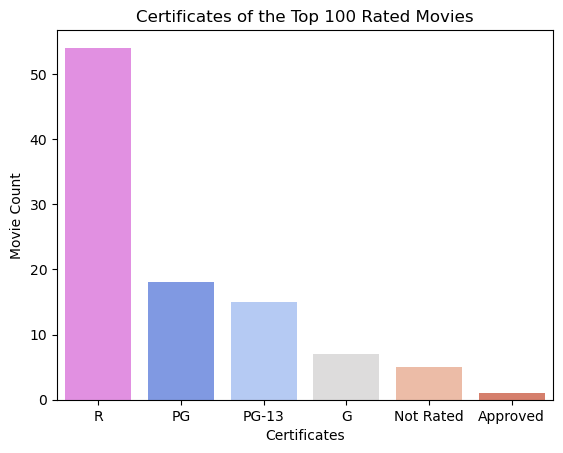

In [53]:
by_c = movies.sort_values('IMDb Rating',ascending=False)['Certificates'].head(100).value_counts().reset_index()
display(by_c)
cp = ['violet'] + sns.color_palette('coolwarm',n_colors=5)
sns.barplot(data=by_c, x='Certificates',y='count',palette=cp,hue='Certificates') # value_counts creates a column called 'count' by default
plt.title('Certificates of the Top 100 Rated Movies')
plt.ylabel('Movie Count')
plt.xlabel('Certificates')
plt.show()

,Certificates,count
0,R,36
1,G,20
2,PG-13,17
3,PG,15
4,Approved,8
5,Not Rated,4


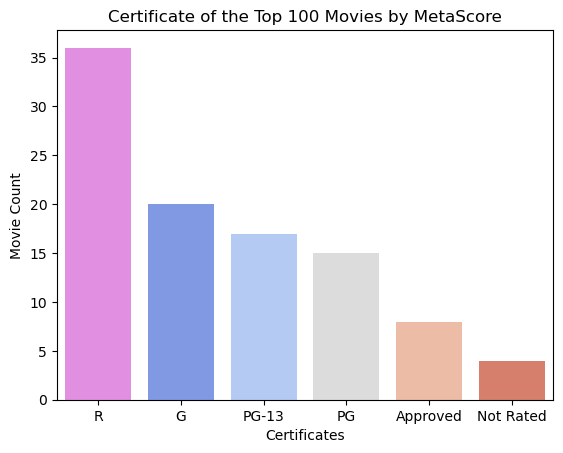

In [54]:
by_c_1 = movies.sort_values('MetaScore',ascending=False)['Certificates'].head(100).value_counts().reset_index()
display(by_c_1)
cp = ['violet'] + sns.color_palette('coolwarm',n_colors=5)
sns.barplot(data=by_c_1, x='Certificates',y='count',palette=cp,hue='Certificates')
plt.title('Certificate of the Top 100 Movies by MetaScore')
plt.ylabel('Movie Count')
plt.xlabel('Certificates')
plt.show()

It is very clear from the tabulations and bar plots that top movies, whether by IMDb Rating or MetaScore, tend to be R rated.
They are followed by G, PG, and PG-13 differing by small amounts.

,Title,IMDb Rating,MetaScore
263,Harry Potter and the Deathly Hallows: Part 2,8.1,85.0
265,Harry Potter and the Prisoner of Azkaban,7.9,82.0
273,Harry Potter and the Goblet of Fire,7.7,81.0
837,Harry Potter and the Half-Blood Prince,7.6,78.0
840,Harry Potter and the Order of the Phoenix,7.5,71.0
12,Harry Potter and the Sorcerer's Stone,7.6,65.0
841,Harry Potter and the Deathly Hallows: Part 1,7.7,65.0
254,Harry Potter and the Chamber of Secrets,7.4,63.0


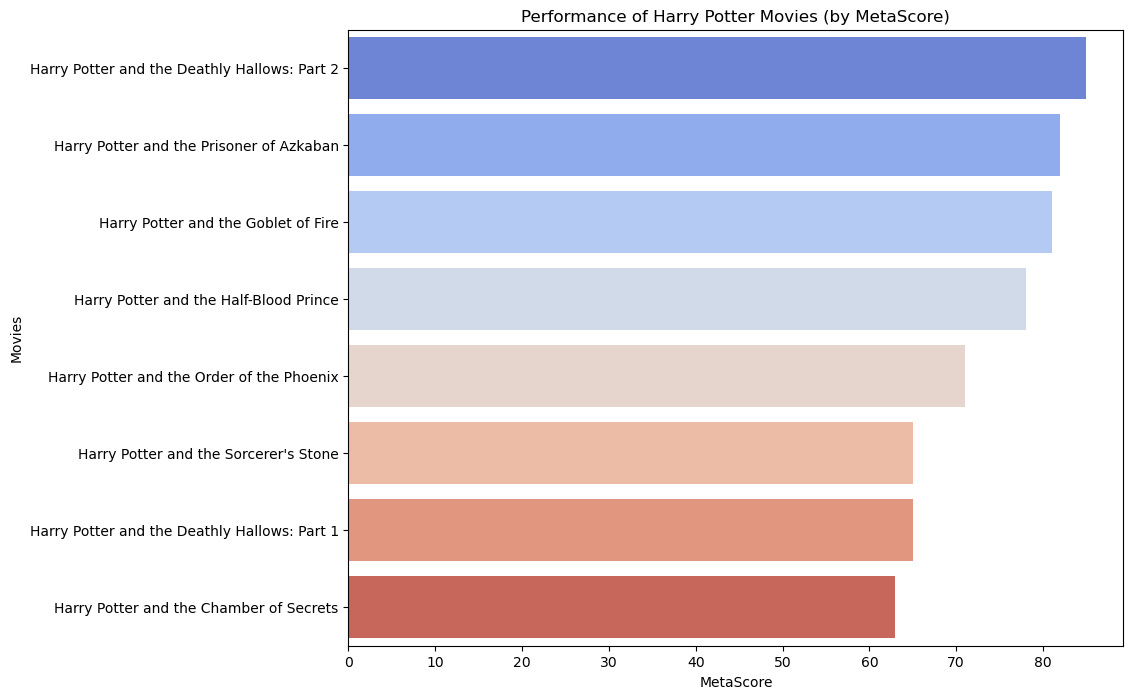

,Title,IMDb Rating,MetaScore
263,Harry Potter and the Deathly Hallows: Part 2,8.1,85.0
265,Harry Potter and the Prisoner of Azkaban,7.9,82.0
273,Harry Potter and the Goblet of Fire,7.7,81.0
841,Harry Potter and the Deathly Hallows: Part 1,7.7,65.0
12,Harry Potter and the Sorcerer's Stone,7.6,65.0
837,Harry Potter and the Half-Blood Prince,7.6,78.0
840,Harry Potter and the Order of the Phoenix,7.5,71.0
254,Harry Potter and the Chamber of Secrets,7.4,63.0


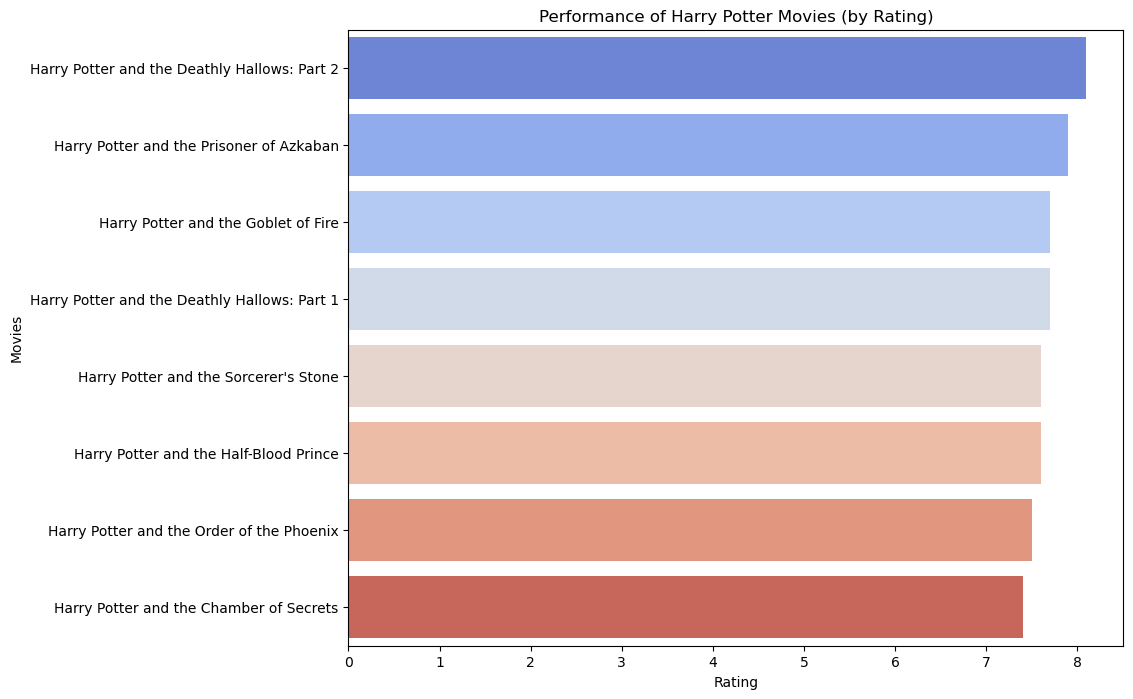

In [55]:
# How were the performances of Harry Potter Movies
hp = movies[movies['Title'].str.contains('Harry Potter',case=False)]
hp1 = hp[['Title','IMDb Rating','MetaScore']].drop_duplicates()

display(hp1.sort_values('MetaScore',ascending=False))
plt.figure(figsize=(10,8))
sns.barplot(data= hp1.sort_values('MetaScore',ascending=False), x='MetaScore',y='Title', palette= 'coolwarm',hue = 'Title')
plt.title('Performance of Harry Potter Movies (by MetaScore)')
plt.xlabel('MetaScore')
plt.ylabel('Movies')
plt.show()

display(hp1.sort_values('IMDb Rating',ascending=False))
plt.figure(figsize=(10,8))
sns.barplot(data= hp1.sort_values('IMDb Rating',ascending=False), x='IMDb Rating',y='Title', palette= 'coolwarm',hue = 'Title')
plt.title('Performance of Harry Potter Movies (by Rating)')
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.show()

The above visualizations are relevant if the analyst in studying how effectively the Harry Potter books have been translated into movies.
Clearly, Harry Potter and the Deathly Hallows Part 2 ranks first in both the categories, Rating and MetaScore.

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
2100,The People's Story,9.5,2000,PG,Documentary,Steven Scaffidi,Daniel RadcliffeEmma WatsonRupert Grint,66.0,56.0
1985,Ratherman,8.5,2012,R,Sci-Fi,Lisandro Boccacci,Daniel RadcliffeEmma WatsonRupert Grint,66.0,116.3
1923,Emocean,8.3,2015,R,Sci-Fi,Jonathan Jarzyna,Daniel RadcliffeEmma WatsonRupert Grint,66.0,116.3
2118,When the Iron Bird Flies: Tibetan Buddhism Arr...,8.3,2012,PG,Documentary,Victress Hitchcock,Daniel RadcliffeEmma WatsonRupert Grint,66.0,96.0
1807,"Minor Daemon, Volume 1",8.3,2021,R,Animation,Jon Rafman,Daniel RadcliffeEmma WatsonRupert Grint,66.0,116.3
1680,Karim Patwa's Spaceship,8.3,2004,R,Biography,Karim Patwa,Daniel RadcliffeEmma WatsonRupert Grint,66.0,116.3
299,Super/Man: The Christopher Reeve Story,8.2,2024,PG-13,Documentary,Ian Bonhôte,Daniel RadcliffeEmma WatsonRupert Grint,86.0,106.0
2125,Lost & Found,8.2,2016,PG,Documentary,John Choi,Daniel RadcliffeEmma WatsonRupert Grint,66.0,82.0
263,Harry Potter and the Deathly Hallows: Part 2,8.1,2011,PG-13,Adventure,David Yates,Daniel RadcliffeEmma WatsonRupert Grint,85.0,130.0
1474,Nano-Babies,8.1,1998,R,Documentary,Jürg Hassler,Daniel RadcliffeEmma WatsonRupert Grint,66.0,116.3


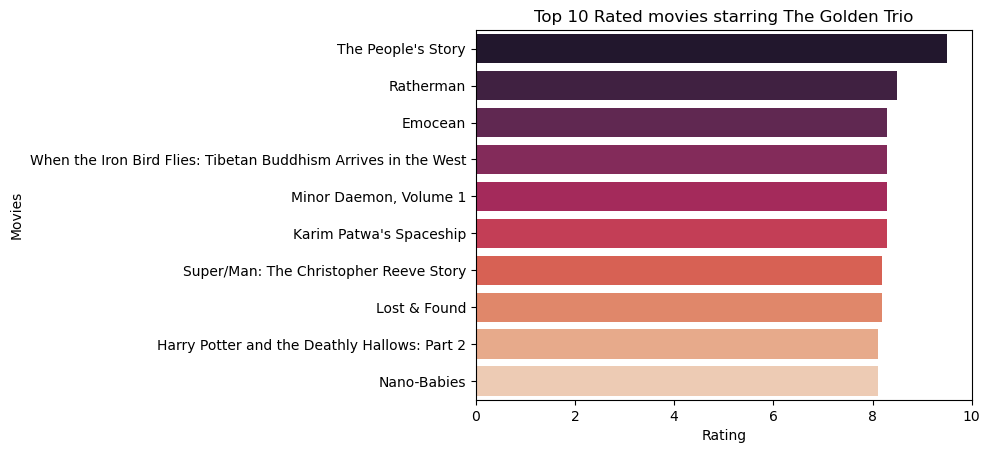

In [56]:
# Top 10 movies where the cast where the cast are Daniel Radcliffe, Emma Watson, and Rupert Grint:
gol_trio = movies[(movies['Star Cast'] == 'Daniel RadcliffeEmma WatsonRupert Grint'   # This star cast is often referred to as the Golden Trio
                  ) & (movies['Year']>1990)].sort_values('IMDb Rating',ascending=False)
display(gol_trio.head(10))
sns.barplot(data = gol_trio.head(10), y='Title',x='IMDb Rating',hue='Title',palette='rocket')
plt.title('Top 10 Rated movies starring The Golden Trio')
plt.ylabel('Movies')
plt.xlabel('Rating')
plt.xticks(np.arange(0,11,2))
plt.show()

Considering the fact that the Golden Trio has starred 140 movies, it becomes essential to know they're top performances.
From the results, it was The People's Story with a rating of 9.5 that took the first place.

,Genre,Star Cast,movie_count
0,Documentary,Daniel RadcliffeEmma WatsonRupert Grint,41
1,Sci-Fi,Daniel RadcliffeEmma WatsonRupert Grint,25
2,Action,Daniel RadcliffeEmma WatsonRupert Grint,19
3,Animation,Daniel RadcliffeEmma WatsonRupert Grint,18
4,Drama,Daniel RadcliffeEmma WatsonRupert Grint,14
5,Comedy,Daniel RadcliffeEmma WatsonRupert Grint,7
6,Adventure,Daniel Radcliffe,6
7,Horror,Daniel RadcliffeEmma WatsonRupert Grint,4
8,Crime,Quentin TarantinoRoger Avary,2
9,Fantasy,Dakota FanningGeorgina CampbellOlwen Fouéré,2


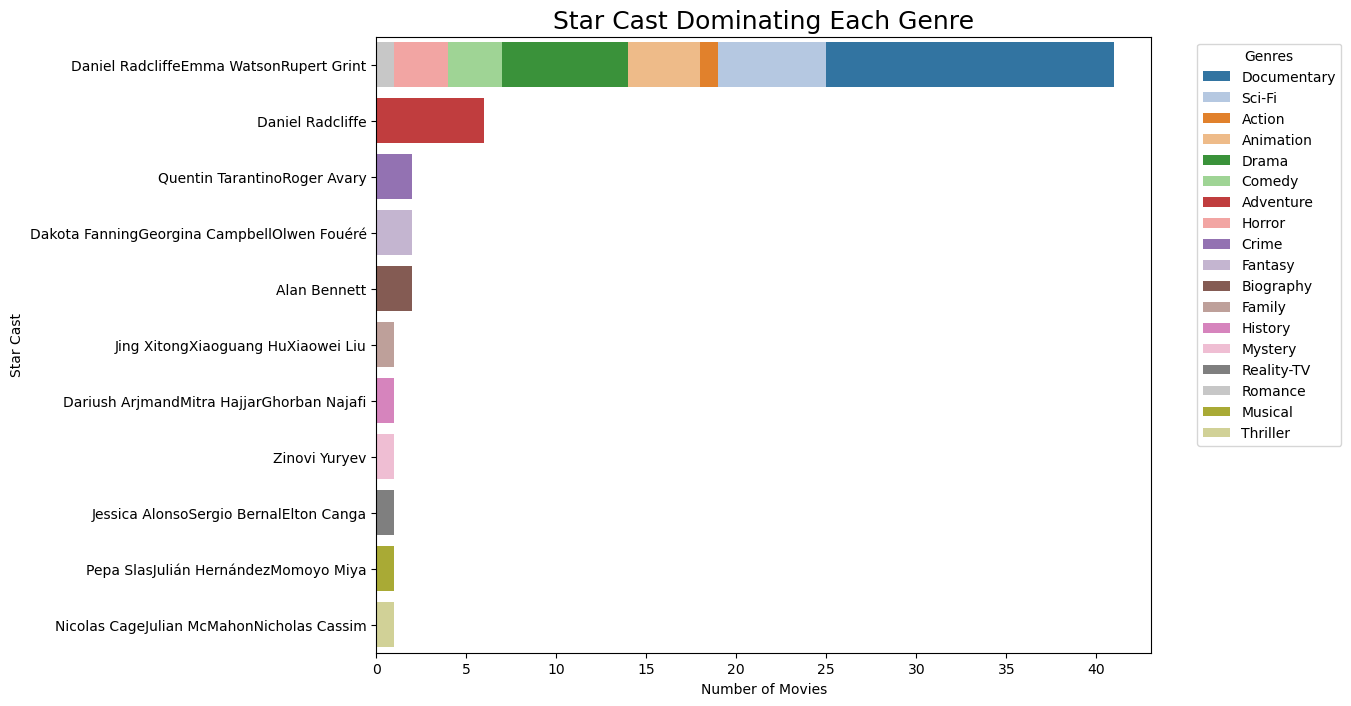

In [57]:
# Star Cast performing in the most number of movies Genre-wise
gw = movies.groupby(['Genre','Star Cast']).size().reset_index(name='movie_count'            # size() generates unique combos of star cast and genre
     ).sort_values('movie_count',ascending=False
    ).groupby("Genre").head(1).reset_index(drop=True)             # the second groupby is necessary because it groups the combos based on Genre
display(gw)
plt.figure(figsize=(10,8))
sns.barplot(data= gw, x='movie_count',y='Star Cast',hue='Genre',palette='tab20',dodge=False)

# dodge=True (default): Bars for different hue categories are placed side by side.
# dodge=False: Bars for different hue categories are stacked on top of each other at the same x-position. - better for readibility

plt.title('Star Cast Dominating Each Genre',fontsize=18)
plt.xlabel('Number of Movies')
plt.ylabel('Star Cast')
plt.legend(title = 'Genres',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see that the Star Cast, Daniel Radcliffe, Emma Watson, Rupert Grint dominates 8 Genres, performing the best among them in Documentaries, followed by Sci-Fi. 

,Certificates,Star Cast,movie_count
0,R,Daniel RadcliffeEmma WatsonRupert Grint,97
1,PG-13,Daniel RadcliffeEmma WatsonRupert Grint,12
2,PG,Daniel RadcliffeEmma WatsonRupert Grint,12
3,Not Rated,Daniel RadcliffeEmma WatsonRupert Grint,8
4,G,Daniel RadcliffeEmma WatsonRupert Grint,7
5,TV-14,Daniel RadcliffeEmma WatsonRupert Grint,4
6,NC-17,Srdjan 'Zika' TodorovicSergej TrifunovicJelena...,2
7,TV-G,Rita OraJoshua ColleyChina Anne McClain,2
8,Approved,James Stewart,2
9,TV-MA,Marsha TimothyAlex AbbadAnantya Kirana,2


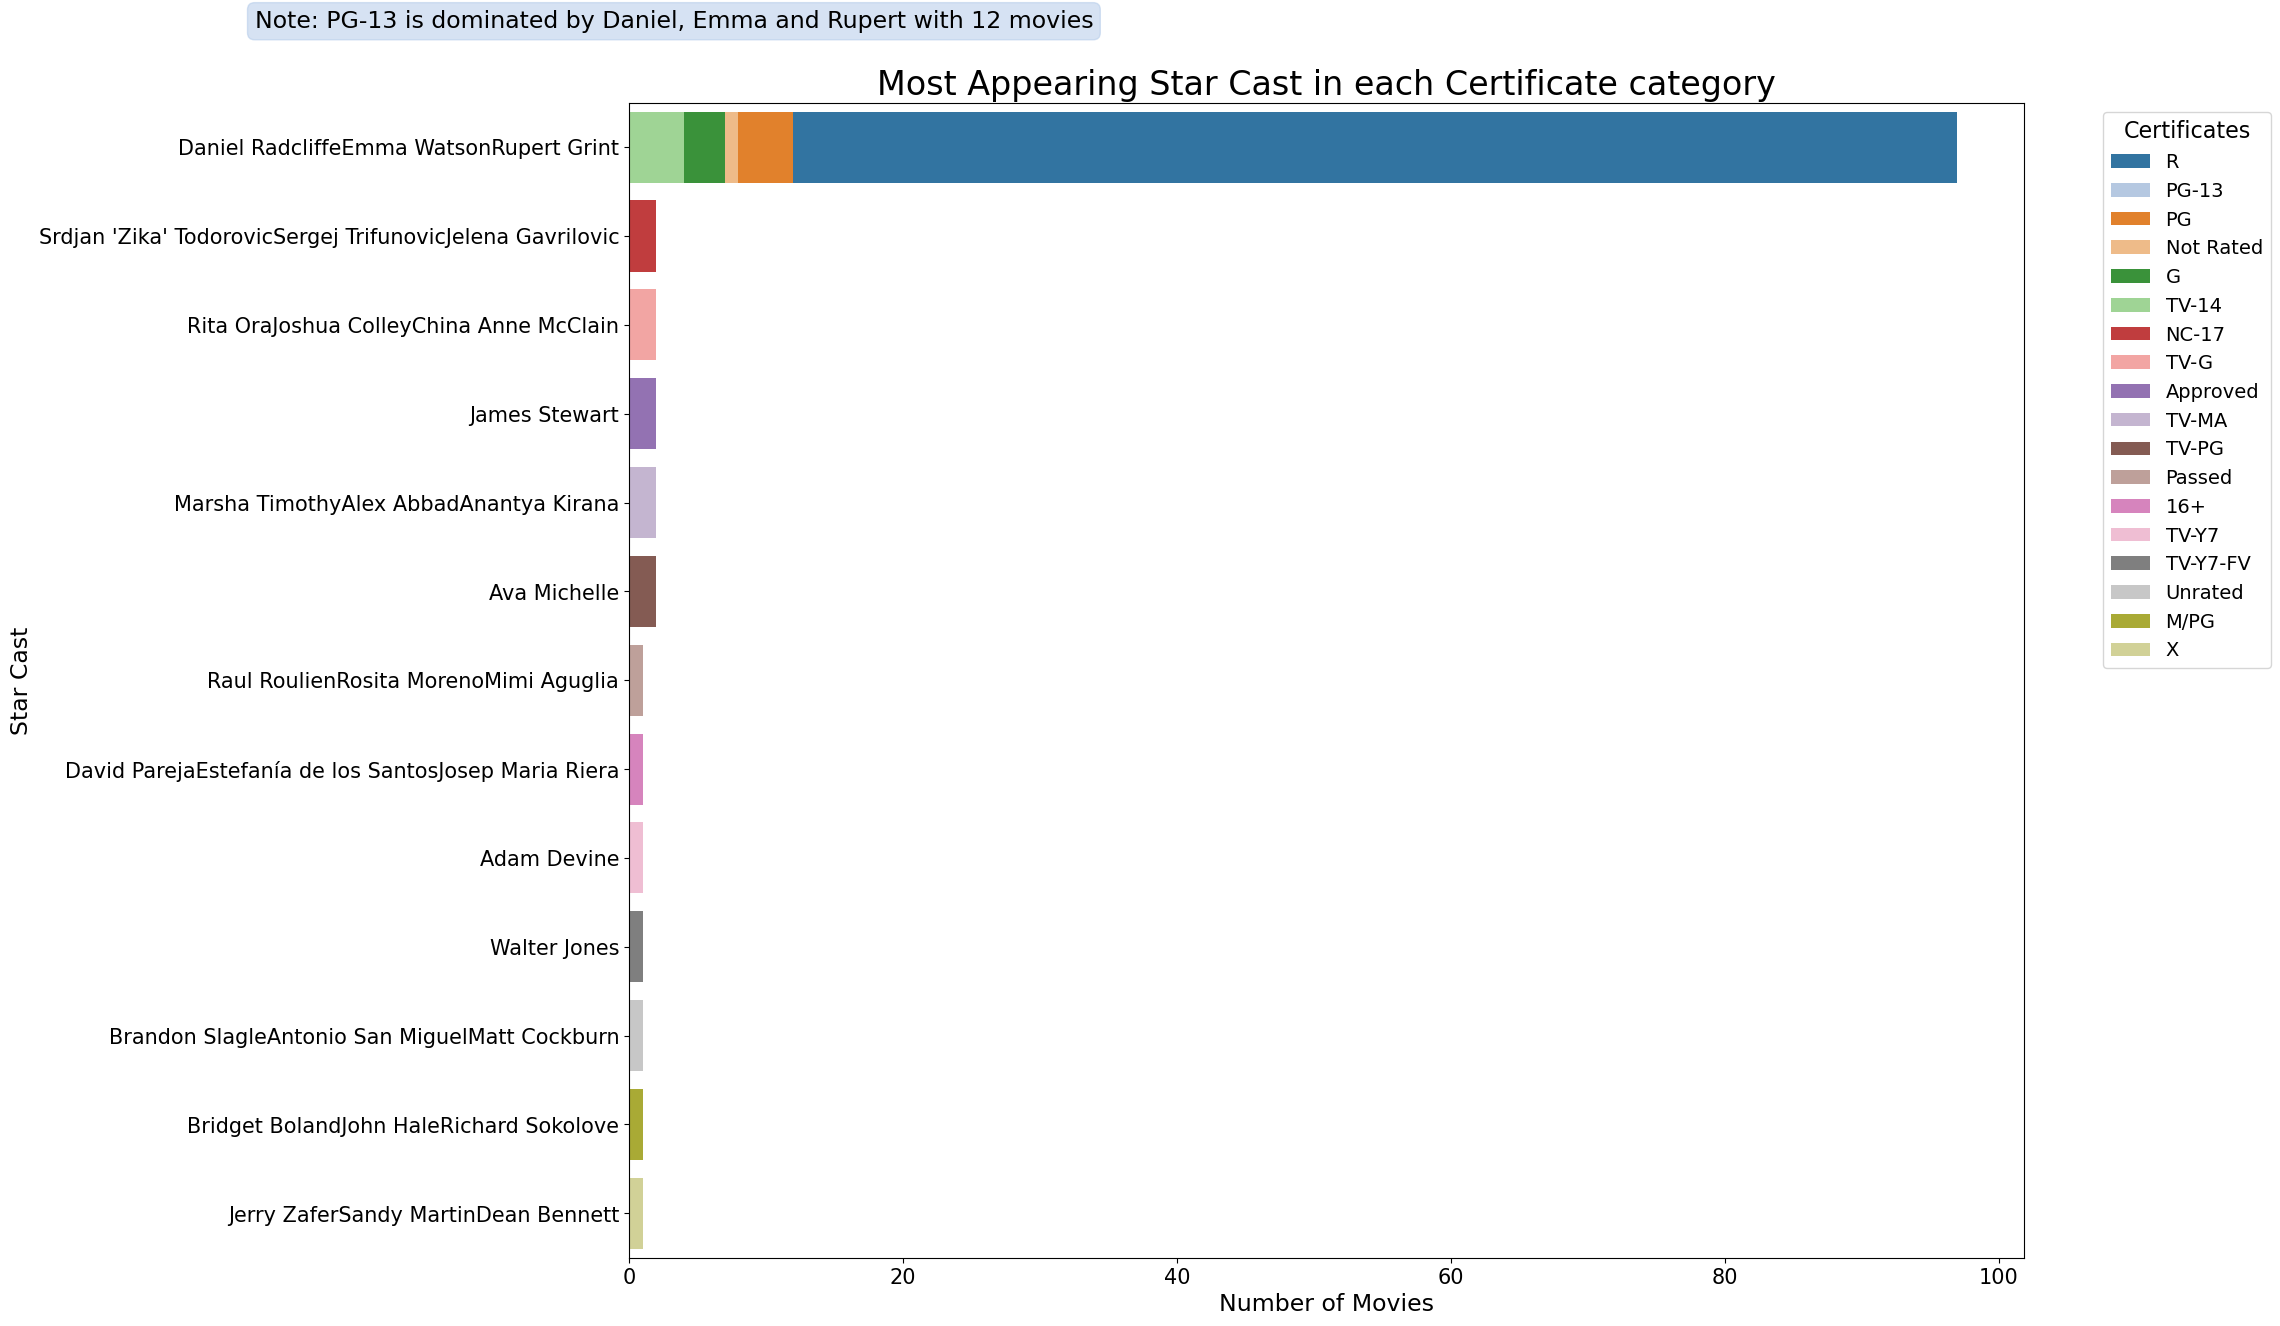

In [58]:
# Star Cast performing in the most number of movies Certificate-wise
cw = movies.groupby(['Certificates','Star Cast']).size().reset_index(name='movie_count'
                    ).sort_values('movie_count',ascending=False).groupby("Certificates").head(1).reset_index(drop=True)
display(cw)
plt.figure(figsize=(18,15))
sns.barplot(data= cw, x='movie_count',y='Star Cast',hue='Certificates',palette='tab20',dodge=False)# dodge parameter = False to prevent overlapping bars
plt.title('Most Appearing Star Cast in each Certificate category',fontsize=24)
plt.xlabel('Number of Movies',fontsize=17)
plt.ylabel('Star Cast',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

leg = plt.legend(title ='Certificates',fontsize=14 ,bbox_to_anchor=(1.05, 1), loc='upper left')
note_text = 'Note: PG-13 is dominated by Daniel, Emma and Rupert with 12 movies'
plt.figtext(
    0.15, 0.93,
    note_text,
    fontsize=17,
    bbox=dict(boxstyle="round", alpha=0.5, color='#aec7e8'),
    ha='center'
)
leg.set_title("Certificates", prop={'size': 16, 'weight': 'normal'}) 
plt.show()

,index,Year,Genre,Title,IMDb Rating
0,0,1917,Drama,"Homunculus, 6. Teil - Das Ende des Homunculus",6.7
1,2,1918,Sci-Fi,A léleklátó sugár,5.3
2,3,1921,Comedy,The Kid,8.2
3,4,1924,Sci-Fi,The City Struck by Lightning,5.7
4,5,1927,Biography,Napoleon,8.2
...,...,...,...,...,...
95,3216,2021,Action,Army of the Dead,5.8
96,3327,2022,Action,Bullet Train,7.3
97,3443,2023,Action,Animal,6.2
98,3594,2024,Action,Aavesham,8.0


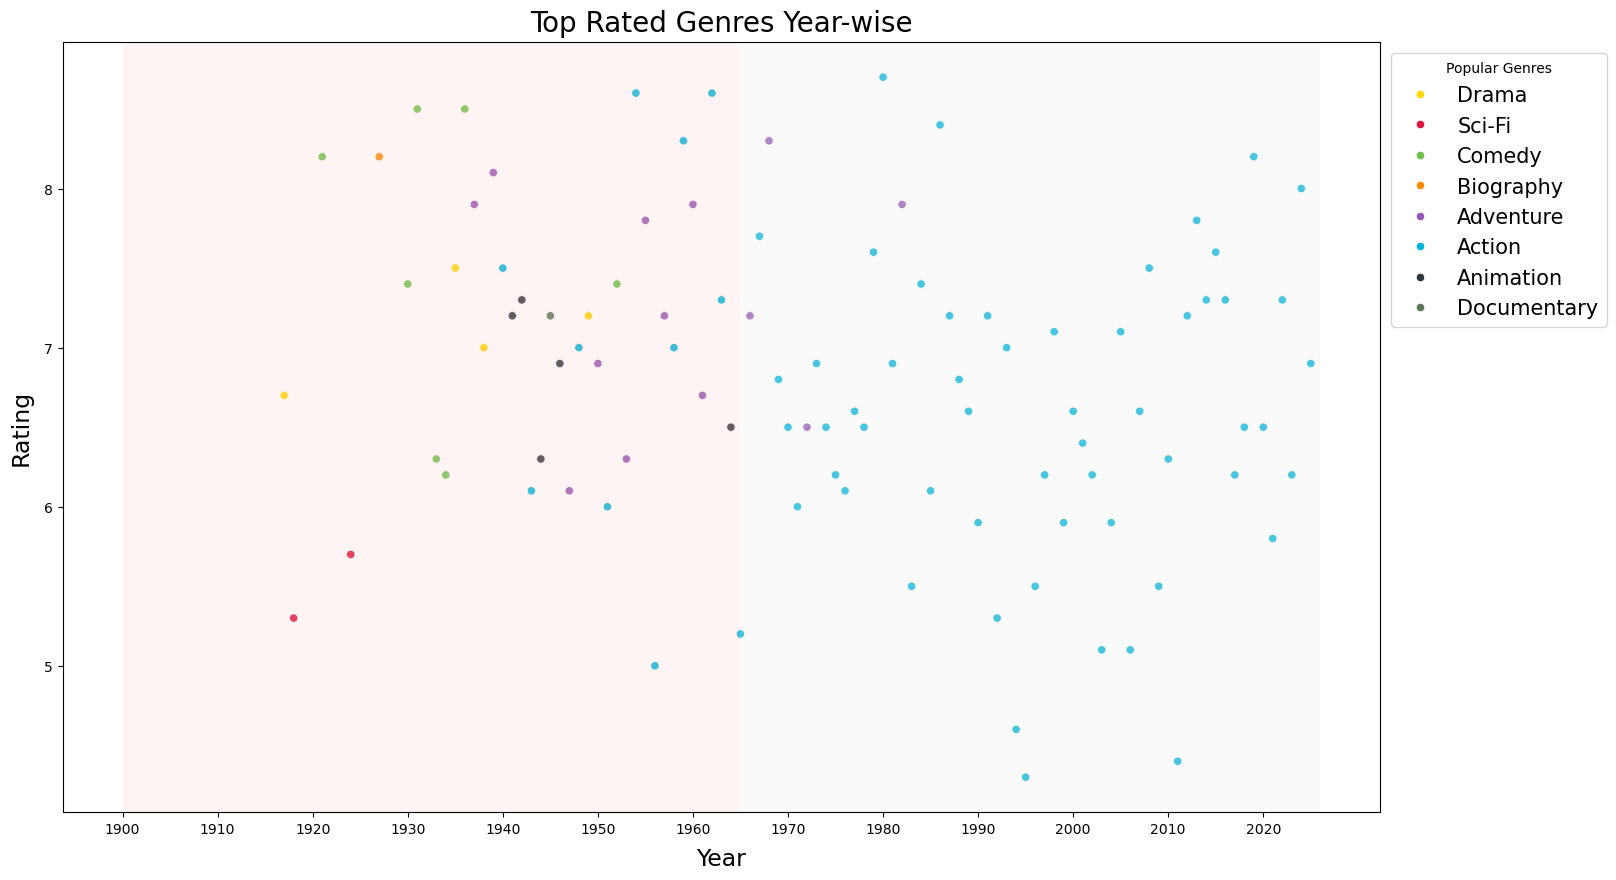

In [59]:
# Top Rated Genre - Year wise
pop_gen = movies.groupby(['Year','Genre','Title'])['IMDb Rating'].max().reset_index().groupby('Year').head(1).reset_index()
display(pop_gen)
plt.figure(figsize=(17,10))
sns.scatterplot(data=pop_gen,x='Year',y='IMDb Rating',hue='Genre',palette = [
    '#FFD700',  # Golden Yellow
    '#DC143C',  # Crimson
    '#6CC24A',  # Green
    '#FF8C00',  # Dark Orange
    '#9558B2',  # Purple
    '#00B4D8',  # Cyan
    '#30363D',  # Subtle Black
    '#5C7457'   # Sage
])
plt.title('Top Rated Genres Year-wise',fontsize=20,pad=8)
plt.xlabel('Year',labelpad=8,fontsize=17)
plt.ylabel('Rating',labelpad=8,fontsize=17)
plt.xticks(np.arange(1900,2026,10))
leg = plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=15)
leg.set_title('Popular Genres')
plt.axvspan(1900,1965, facecolor='#FFD4D4', alpha=0.25)
plt.axvspan(1965, 2026, facecolor='#F0F0F0', alpha=0.3)
plt.show()

We can infer that before 1965, the Genre with the highest rating wasn't definite. But, after 1965, Action movies dominate almost every year. The avxspan regions help us understand that.

,Year,Genre,count
0,1917,Drama,2
1,1918,Sci-Fi,1
2,1921,Comedy,1
3,1924,Sci-Fi,1
4,1927,Biography,1
...,...,...,...
613,2021,Animation,32
626,2022,Animation,28
635,2023,Animation,32
643,2024,Action,43


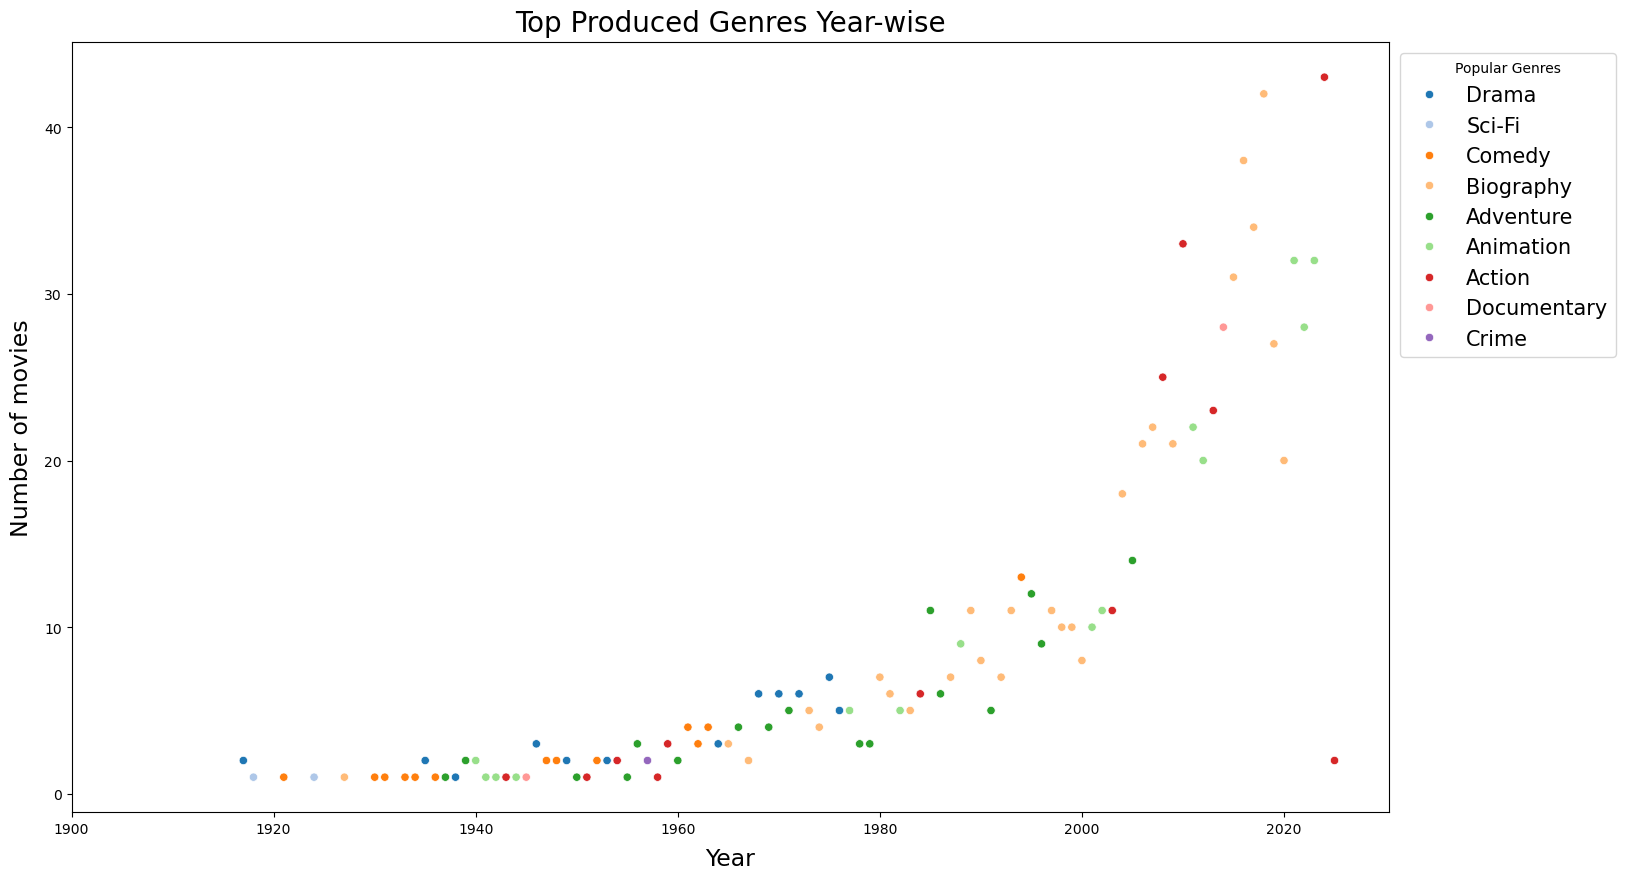

In [60]:
# Finding the most popular Genre per year (most amount of movies)
# pop_gen = (
#     movies.groupby(['Year', 'Genre'])
#     .size()
#     .reset_index(name='count')
#     .loc[lambda x: x.groupby('Year')['count'].idxmax()]       - here, x is the intermediate dataframe
# )

pop_gen_1 = movies.groupby(['Year','Genre'])['Title'].count().reset_index(name='count')
pop_gen = pop_gen_1.loc[pop_gen_1.groupby('Year')['count'].idxmax()] # groups by Year, returns the rows with max count

display(pop_gen)
plt.figure(figsize=(17,10))
sns.scatterplot(data=pop_gen,x='Year',y='count',hue='Genre',palette = 'tab20')
plt.title('Top Produced Genres Year-wise',fontsize=20,pad=8)
plt.xlabel('Year',labelpad=8,fontsize=17)
plt.ylabel('Number of movies',labelpad=8,fontsize=17)
plt.xticks(np.arange(1900,2026,20))
leg = plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=15)
leg.set_title('Popular Genres')
plt.show()